In [1]:
library(tidyverse) # metapackage of all tidyverse packages
library(ggplot2)
library(dplyr)
library(reshape2) # Melt
library(plyr)

library(scales) # visualisation
library(corrplot) # visualisation
library(GGally) # visualisation
library(ggthemes) # visualisation
library(ggalt) # encircle
library(maps) #maps
library(treemap)
library(ggdendro) # Dendogram

#Date
library(scales)
library(zoo)
library(lubridate)

# EDA
library(skimr)

# model
library(caret)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    a

In [2]:
## seed 설정
set.seed(71)

In [3]:
fig=function(x,y){
    options(repr.plot.width = x, repr.plot.height = y)
}

![](desc.png)

In [4]:
## numeric columns
# nstu=student %>% select_if(~is.numeric(.x)) 
## character columns
# cstu=student %>% select_if(~!is.numeric(.x)) 

student=read.csv(file = 'StudentPer.csv',sep=';',stringsAsFactors = F)

In [5]:
## 이것만 봐서는 모르겠다. 
## 다만, 결측값이 없다는 것은 확실하다.

skim(student)

── Data Summary ────────────────────────
                           Values 
Name                       student
Number of rows             649    
Number of columns          33     
_______________________           
Column type frequency:            
  character                17     
  numeric                  16     
________________________          
Group variables            None   

── Variable type: character ────────────────────────────────────────────────────
   skim_variable n_missing complete_rate   min   max empty n_unique whitespace
 1 school                0             1     2     2     0        2          0
 2 sex                   0             1     1     1     0        2          0
 3 address               0             1     1     1     0        2          0
 4 famsize               0             1     3     3     0        2          0
 5 Pstatus               0             1     1     1     0        2          0
 6 Mjob                  0             1     5     8 

In [6]:
student %>% head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13


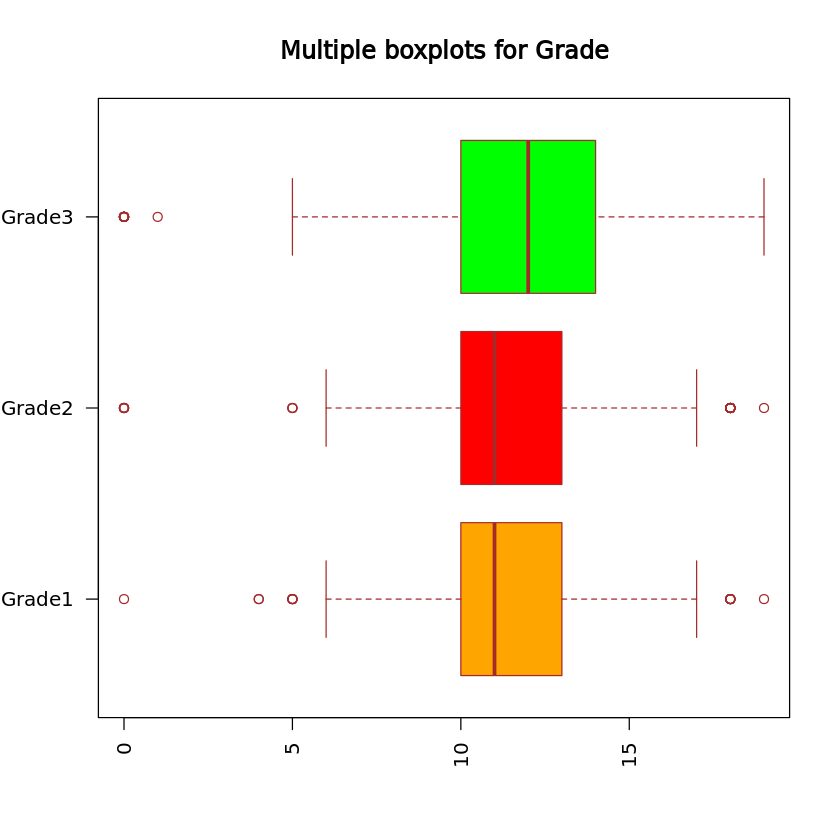

In [7]:
## grade에는 이상치가 있는것 같은데 데이터의 수도 적고 일단은 가져간다. 
## Grade1과 2에 비해 3의 범위가 넓고 중앙값도 낮다.

boxplot(student$G1, student$G2, student$G3,
main = "Multiple boxplots for Grade",
at = c(1,2,3),
names = c("Grade1", "Grade2", "Grade3"),
las = 2,
col = c("orange","red","green"),
border = "brown",
horizontal=T
)

In [8]:
student

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13
GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,13,12,13
GP,F,17,U,GT3,A,4,4,other,teacher,⋯,4,1,4,1,1,1,2,10,13,13
GP,M,15,U,LE3,A,3,2,services,other,⋯,4,2,2,1,1,1,0,15,16,17


In [9]:
## 좋은 성적을 받았으면 yes 아니면 no
## 기준은 첫번째 grade또는 두번째 grade가 마지막 grade보다 같거나 작다면 yes.

student$comp=ifelse((student$G1<=student$G3)|(student$G2<=student$G3),'yes','no')


	Pearson's Chi-squared test with Yates' continuity correction

data:  sex_comp_table
X-squared = 3.177, df = 1, p-value = 0.07468


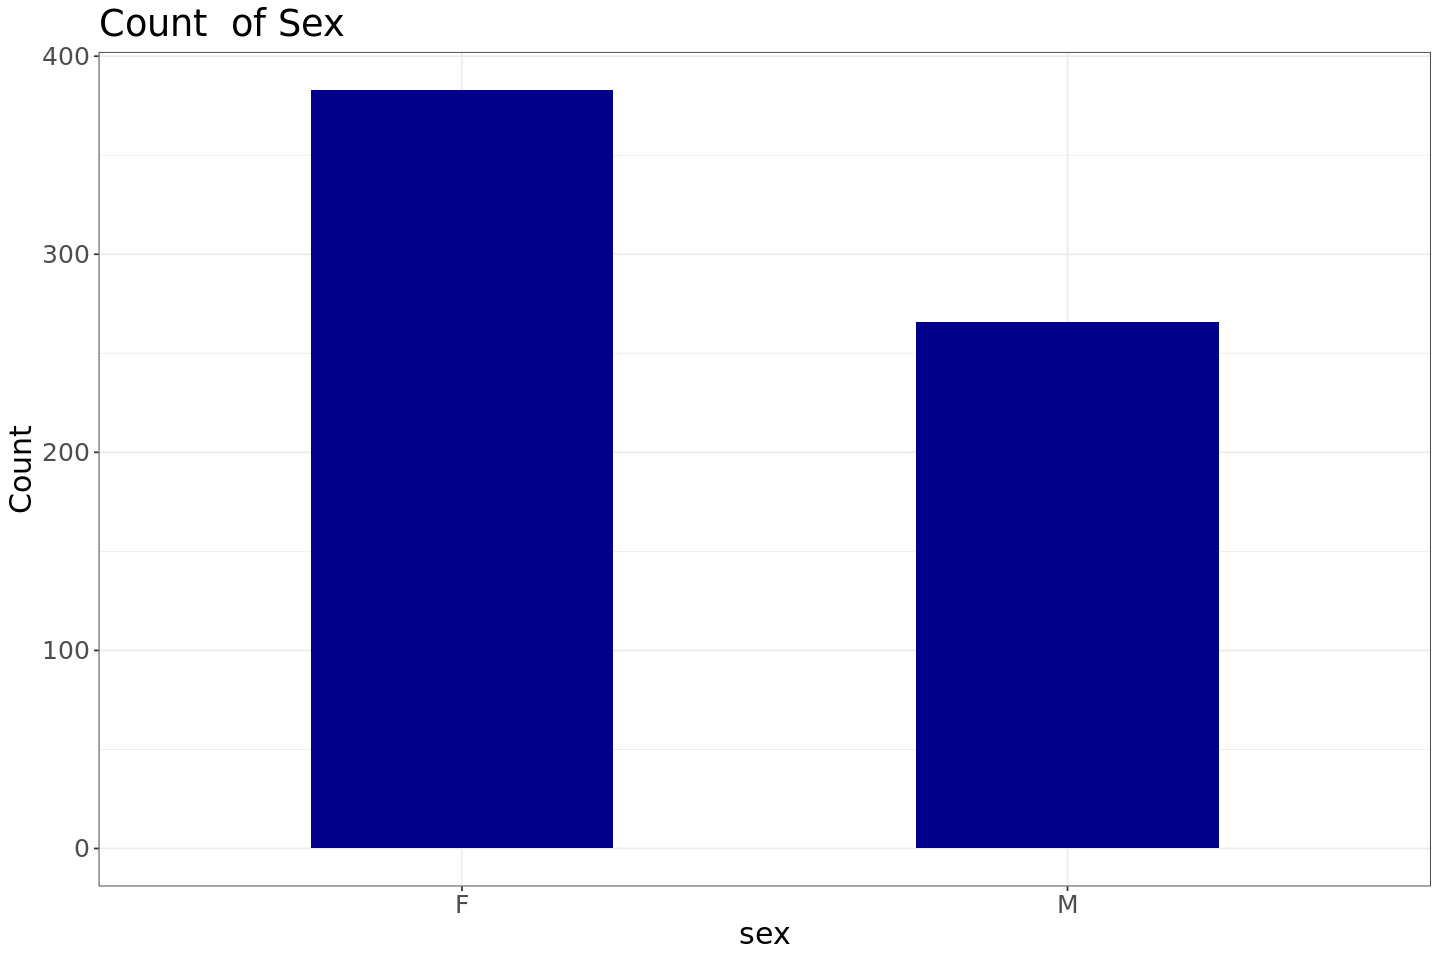

In [10]:
## 카이제곱검정
## 가정 1. 독립성 
## 가정 2. 범주형
## 가정 3. 전체 칸의 20%가 빈도 5 이하 x.

## 성별에 따라 열심히 하는 학생인지 열심히 안하는 학생인지에 대한 차이가 어느정도 있다. 

sex_comp_table=xtabs(~sex+comp,student)
chisq.test(sex_comp_table)

## 일단 여자가 원래 많다.
fig(12,8)
ggplot(student, aes(sex))+
geom_bar(stat="count", width = 0.5, fill="darkblue")+
labs(x="sex",
     y="Count", 
     title="Count  of Sex")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
      axis.text.y= element_text(size=15), axis.title=element_text(size=18))


	Pearson's Chi-squared test with Yates' continuity correction

data:  sex_school_table
X-squared = 4.1289, df = 1, p-value = 0.04216


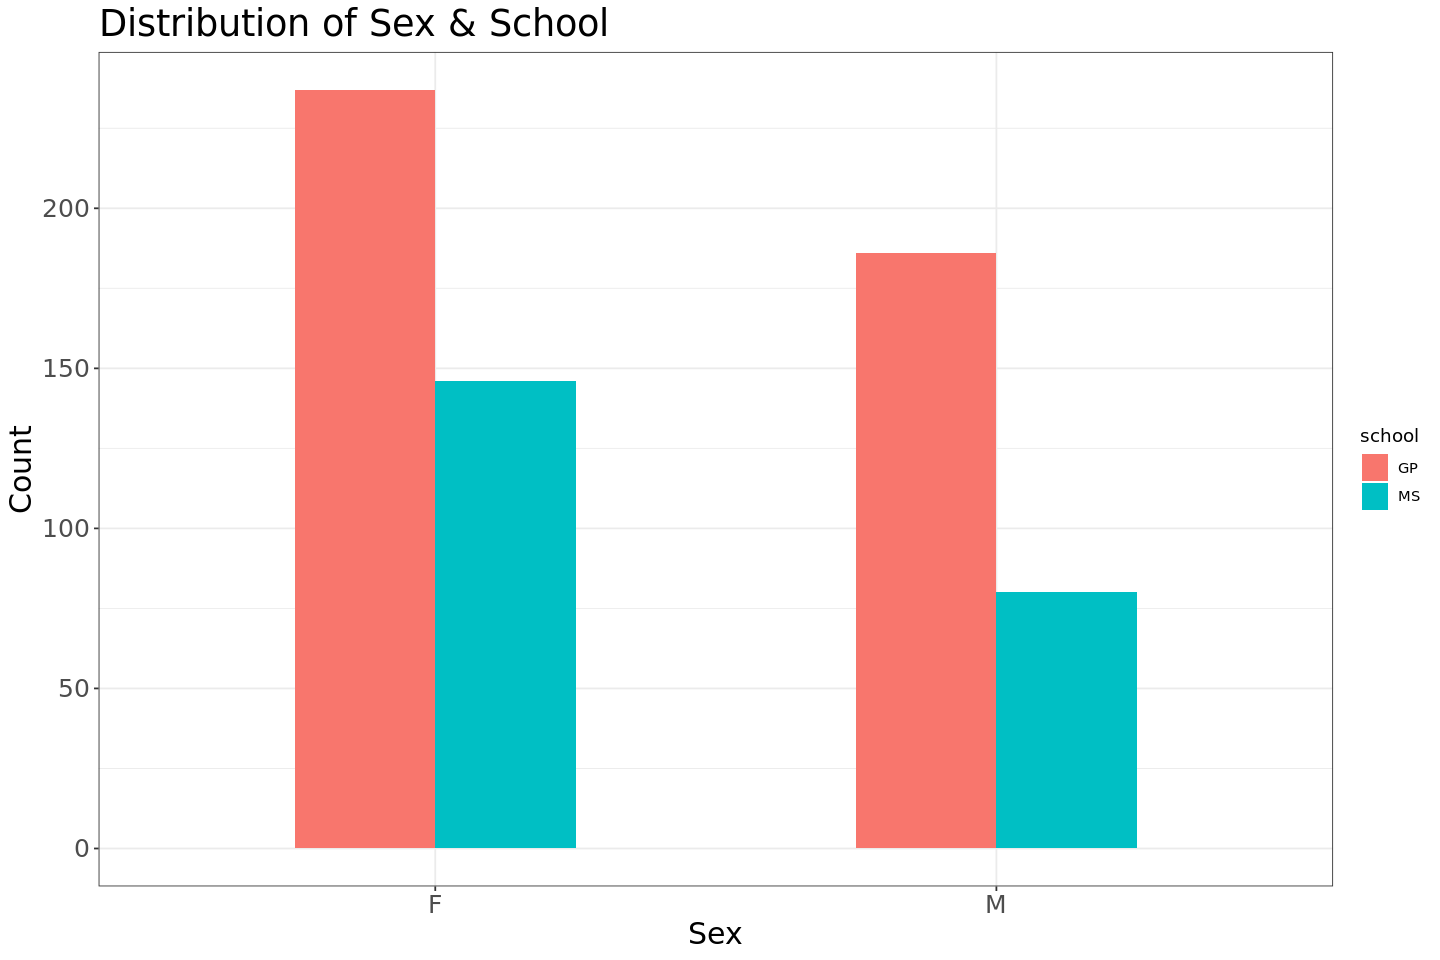

In [11]:
## 학교와 성별의 유의수준 0.05 내에서 빈도차이는 있었다. 
## 그리고 학교의 학생은 GP가 MS보다 많다. unbalanced 하다. 

sex_school_table=xtabs(~sex+school,student)
chisq.test(sex_school_table)

fig(12,8)
ggplot(student, aes(sex,fill=school))+
geom_bar(stat="count", position='dodge',width = 0.5)+
labs(x="Sex",
     y="Count", 
     title="Distribution of Sex & School")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
      axis.text.y= element_text(size=15), axis.title=element_text(size=18))

Warning message in chisq.test(reason_comp_table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  reason_comp_table
X-squared = 8.6936, df = 3, p-value = 0.03365


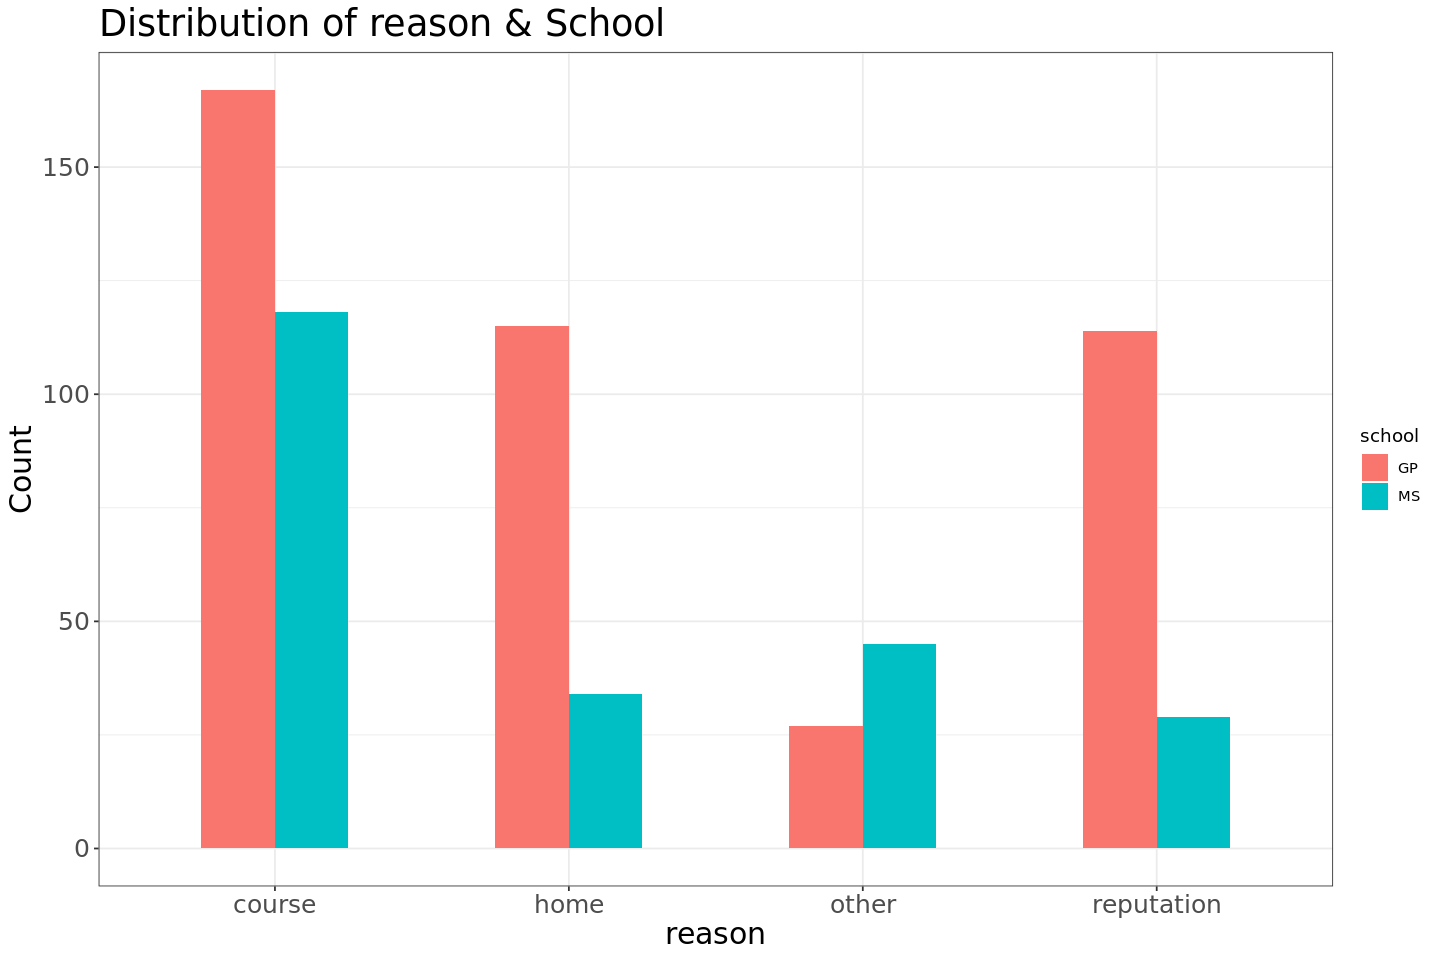

In [12]:
## MS학교는 course가 좋아서그렇고
## GP학교는 유명하고 course도 좋고 원래 좋은 학교 같다.

## 또한, 학교에 온 이유와 좋은 성적은 어느정도 관련이 있었다.

reason_comp_table=xtabs(~reason+comp,student)
chisq.test(reason_comp_table)

fig(12,8)
ggplot(student, aes(reason,fill=school))+
geom_bar(stat="count", position='dodge',width = 0.5)+
labs(x="reason",
     y="Count", 
     title="Distribution of reason & School")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
      axis.text.y= element_text(size=15), axis.title=element_text(size=18))

Warning message in chisq.test(Medu_comp_table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  Medu_comp_table
X-squared = 2.6251, df = 4, p-value = 0.6224


Warning message in chisq.test(Fedu_comp_table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  Fedu_comp_table
X-squared = 8.7166, df = 4, p-value = 0.06859


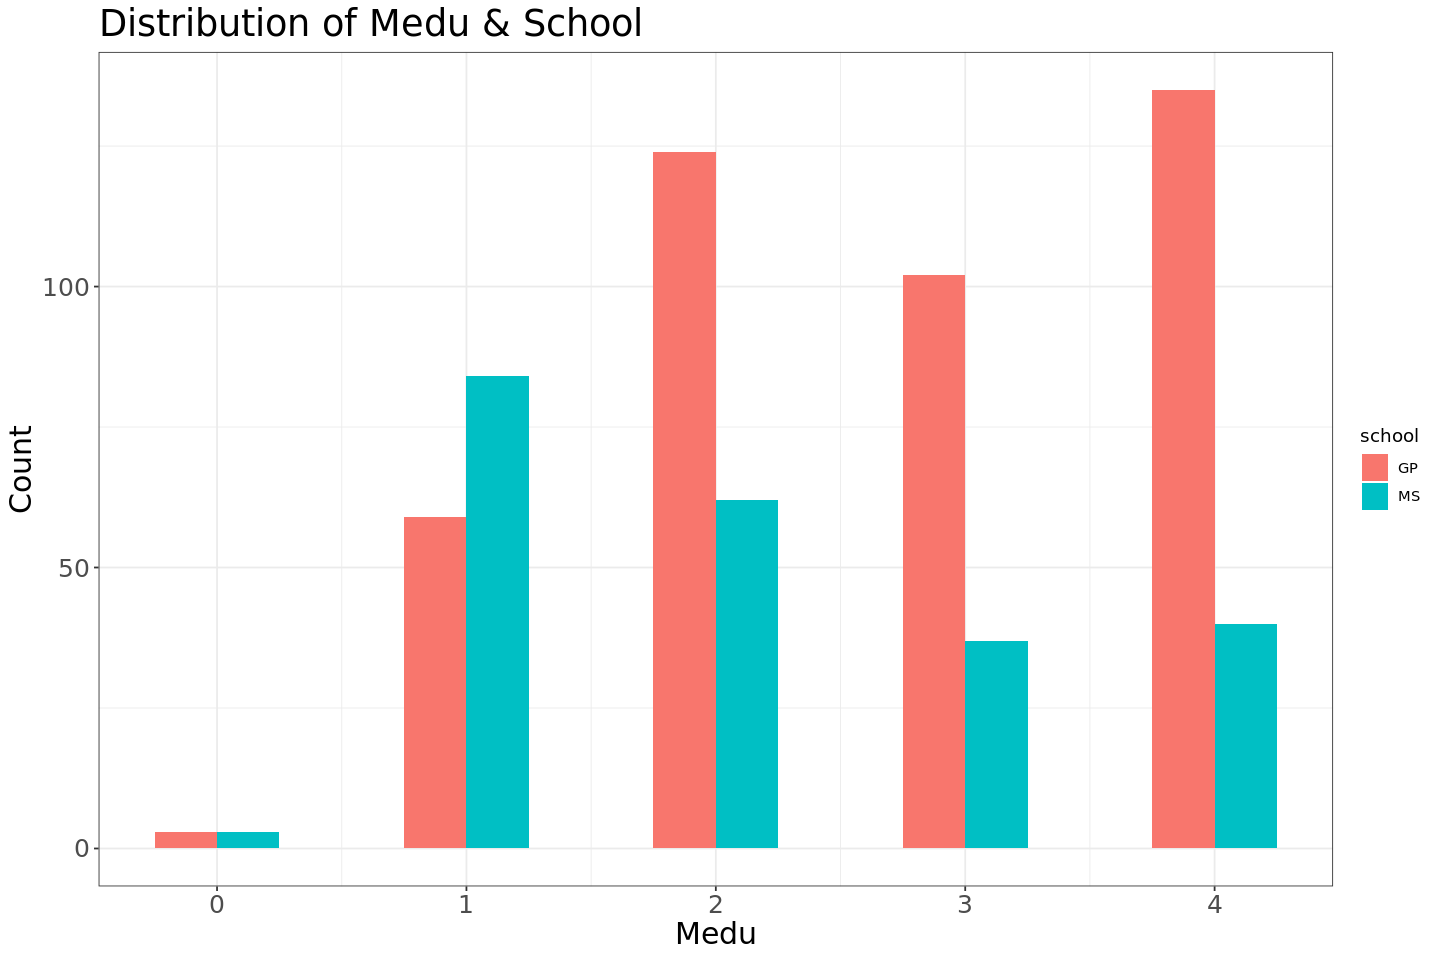

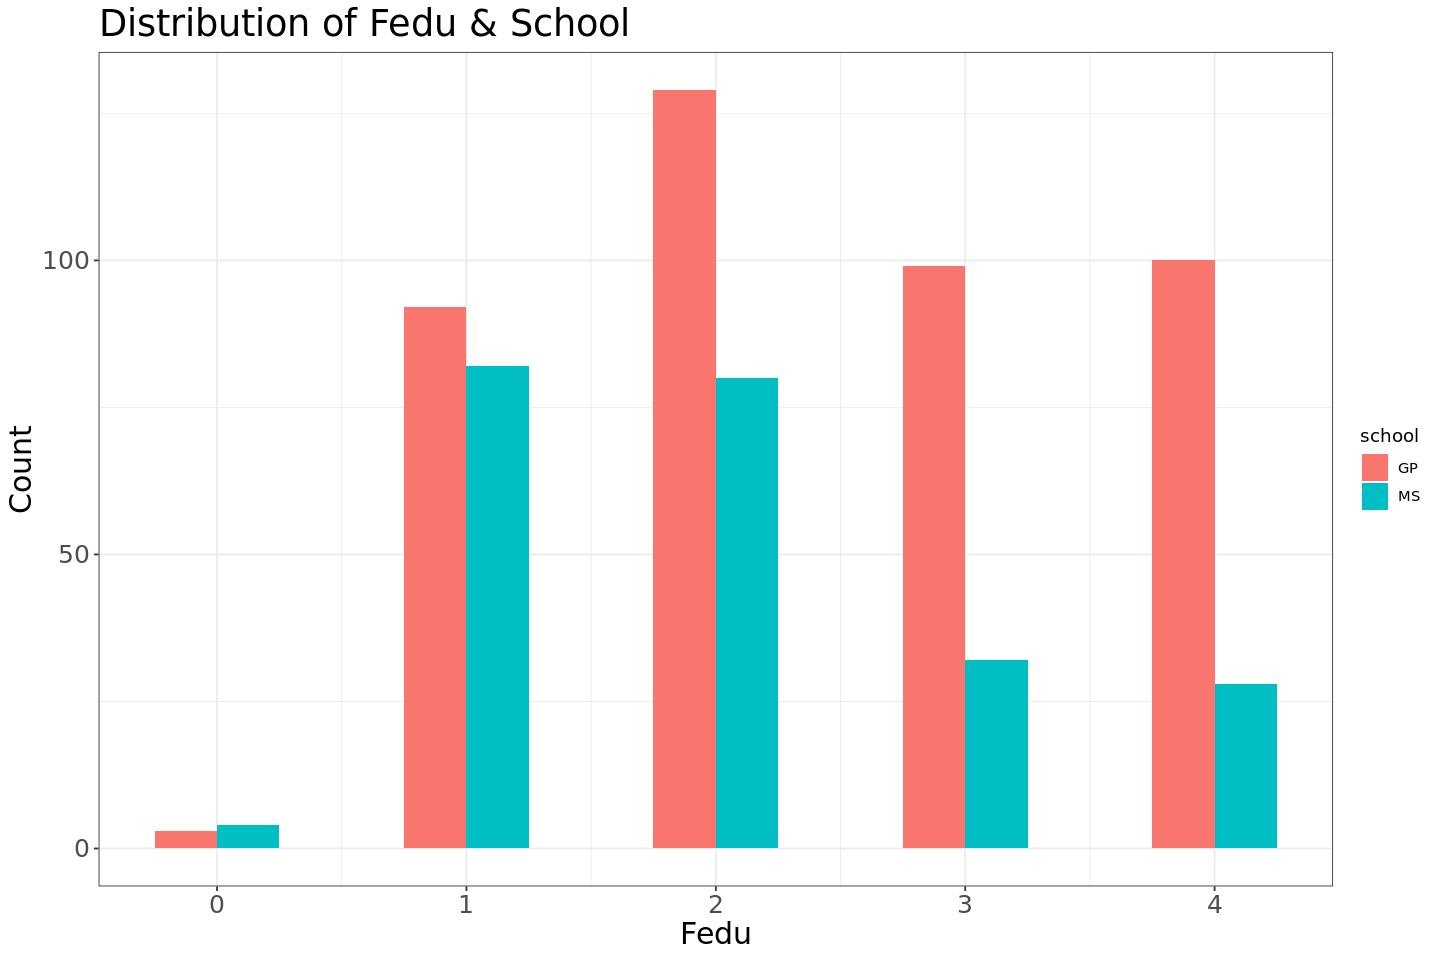

In [13]:
## 대부분의 어머니는 교육을 받으셨는데 
## MS보다 GP의 어머니가 교육을 더 많이 받았다. 

Medu_comp_table=xtabs(~Medu+comp,student)
chisq.test(Medu_comp_table)

fig(12,8)
ggplot(student, aes(Medu,fill=school))+
geom_bar(stat="count", position='dodge',width = 0.5)+
labs(x="Medu",
     y="Count", 
     title="Distribution of Medu & School")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
      axis.text.y= element_text(size=15), axis.title=element_text(size=18))

## GP의 아버지가 높은 교육을 받은 것을 알 수 있다.

Fedu_comp_table=xtabs(~Fedu+comp,student)
chisq.test(Fedu_comp_table)

fig(12,8)
ggplot(student, aes(Fedu,fill=school))+
geom_bar(stat="count", position='dodge',width = 0.5)+
labs(x="Fedu",
     y="Count", 
     title="Distribution of Fedu & School")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
      axis.text.y= element_text(size=15), axis.title=element_text(size=18))

Warning message in chisq.test(guardian_comp_table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  guardian_comp_table
X-squared = 0.64611, df = 2, p-value = 0.7239


List of 4
 $ axis.title :List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 18
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ axis.text.x:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 15
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : num 90
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ axis.text.y:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 15
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   :

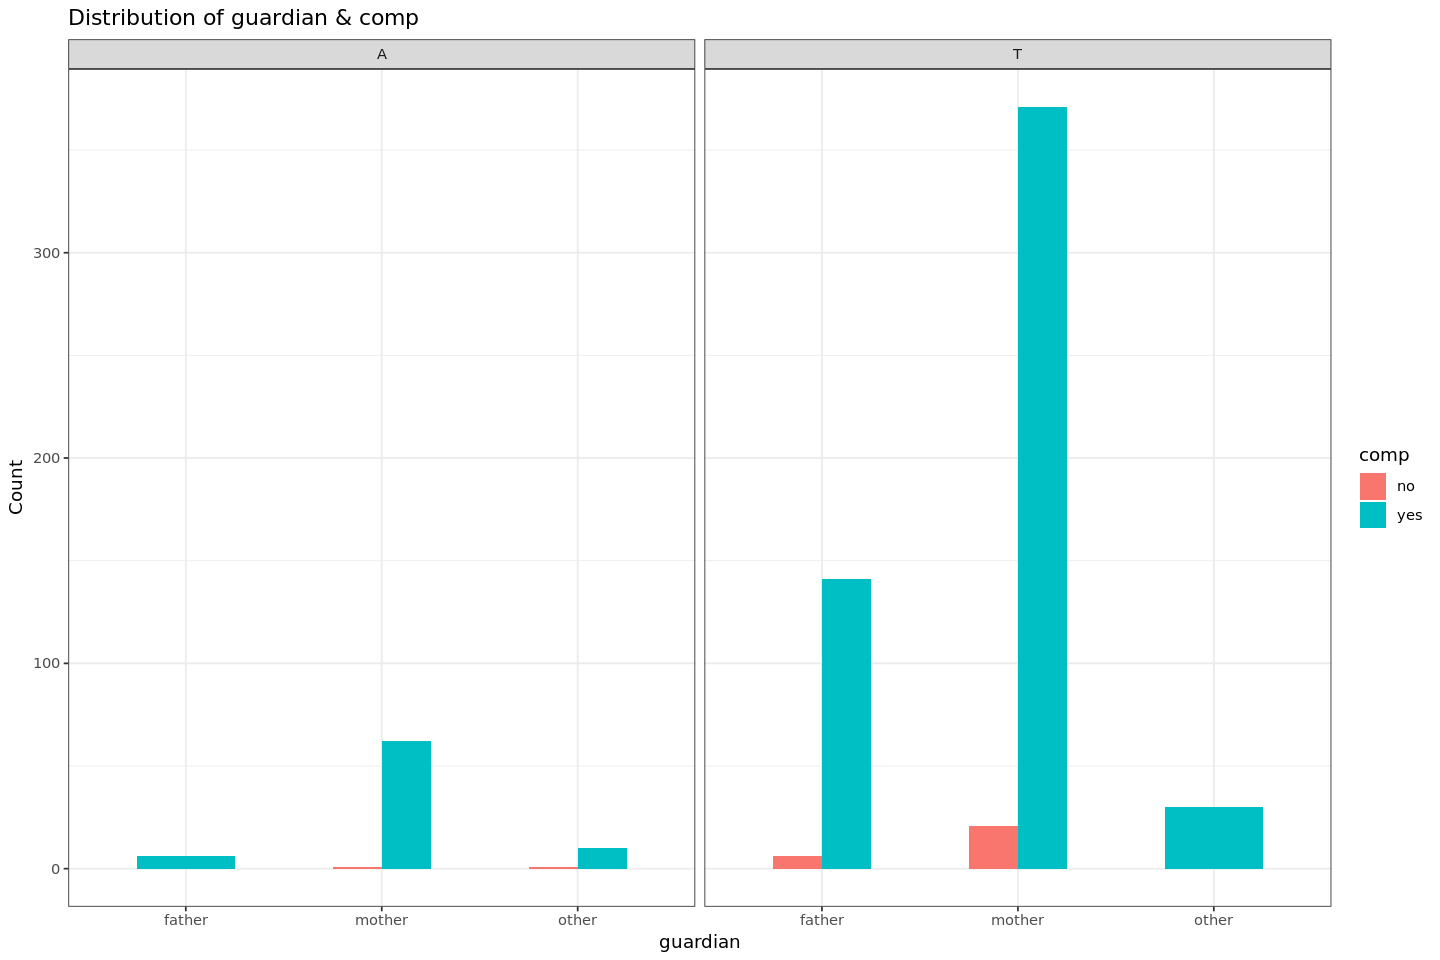

In [14]:
## 보호자가 누구인지는 크게 중요하지 않았다.
## 다만 대부분 엄마였다. 

guardian_comp_table=xtabs(~guardian+comp,student)
chisq.test(guardian_comp_table)

fig(12,8)
ggplot(student, aes(guardian,fill=comp))+
geom_bar(stat="count", position='dodge',width = 0.5)+
labs(x="guardian",
     y="Count", 
     title="Distribution of guardian & comp")+ 
theme_bw()+
facet_wrap(~Pstatus)
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15,angle=90),
      axis.text.y= element_text(size=15), axis.title=element_text(size=18))

Warning message in chisq.test(Mjob_comp_table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  Mjob_comp_table
X-squared = 4.0881, df = 4, p-value = 0.3942


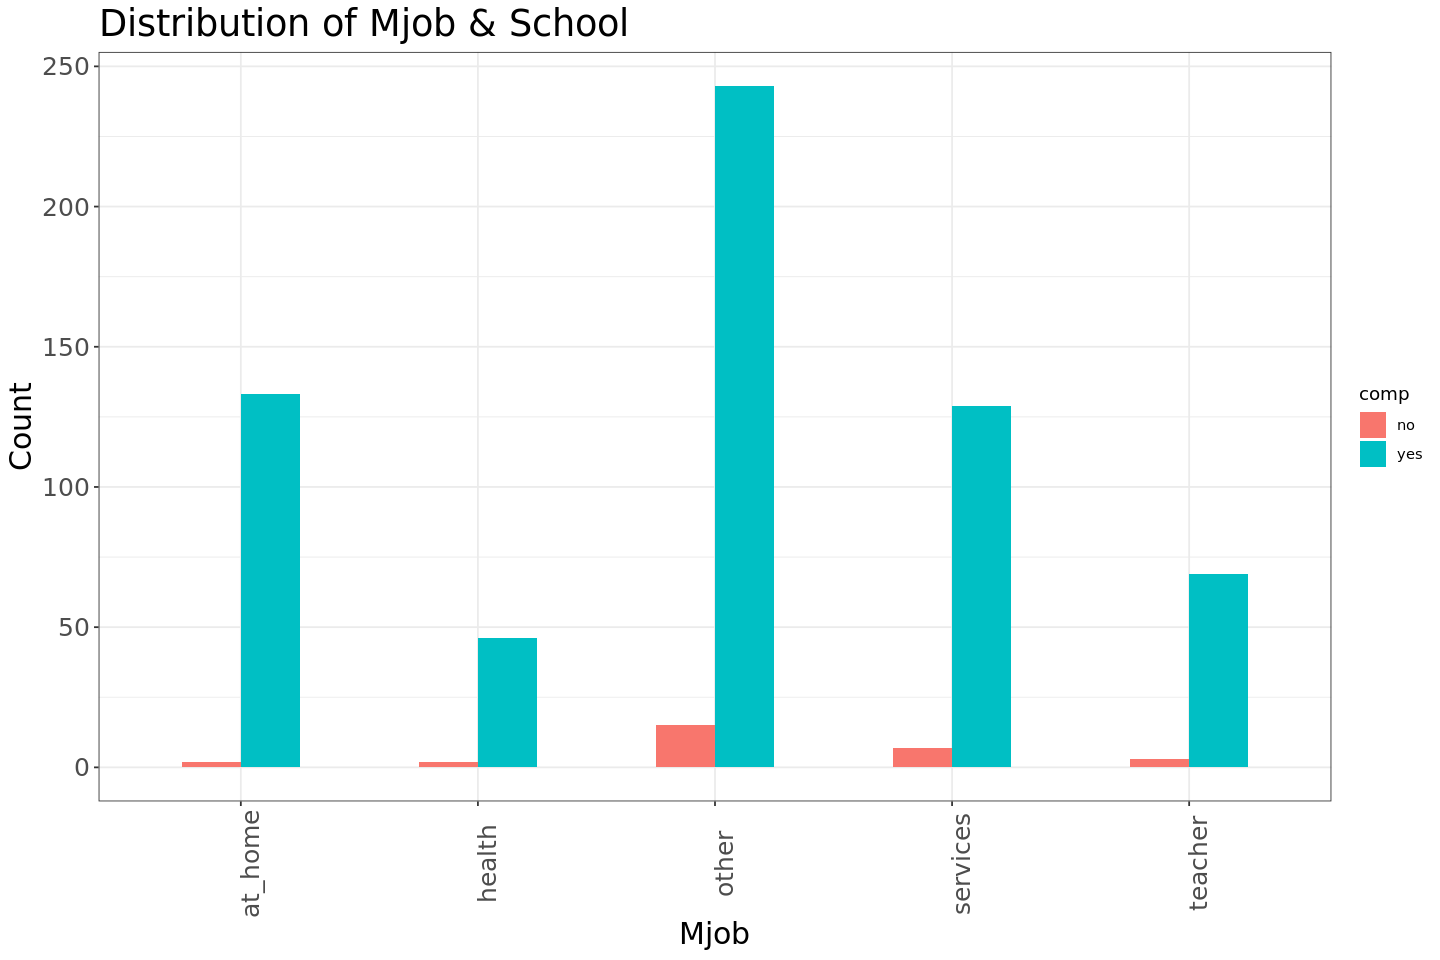

In [15]:
## 아빠의 직업, 엄마의 직업에 열심히 하는 학생과는 차이가 거의 없었다.

Mjob_comp_table=xtabs(~Mjob+comp,student)
chisq.test(Mjob_comp_table)

fig(12,8)
ggplot(student, aes(Mjob,fill=comp))+
geom_bar(stat="count", position='dodge',width = 0.5)+
labs(x="Mjob",
     y="Count", 
     title="Distribution of Mjob & School")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15,angle=90),
      axis.text.y= element_text(size=15), axis.title=element_text(size=18))

In [16]:
## failures가 없을 수록 열심히 하는 학생들이었다. 

studytime_comp_table=xtabs(~failures+comp,student)
chisq.test(studytime_comp_table)

Warning message in chisq.test(studytime_comp_table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  studytime_comp_table
X-squared = 24.464, df = 3, p-value = 1.998e-05


Warning message in chisq.test(traveltime_comp_table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  traveltime_comp_table
X-squared = 0.22656, df = 3, p-value = 0.9732


Warning message in chisq.test(studytime_comp_table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  studytime_comp_table
X-squared = 12.535, df = 3, p-value = 0.005758


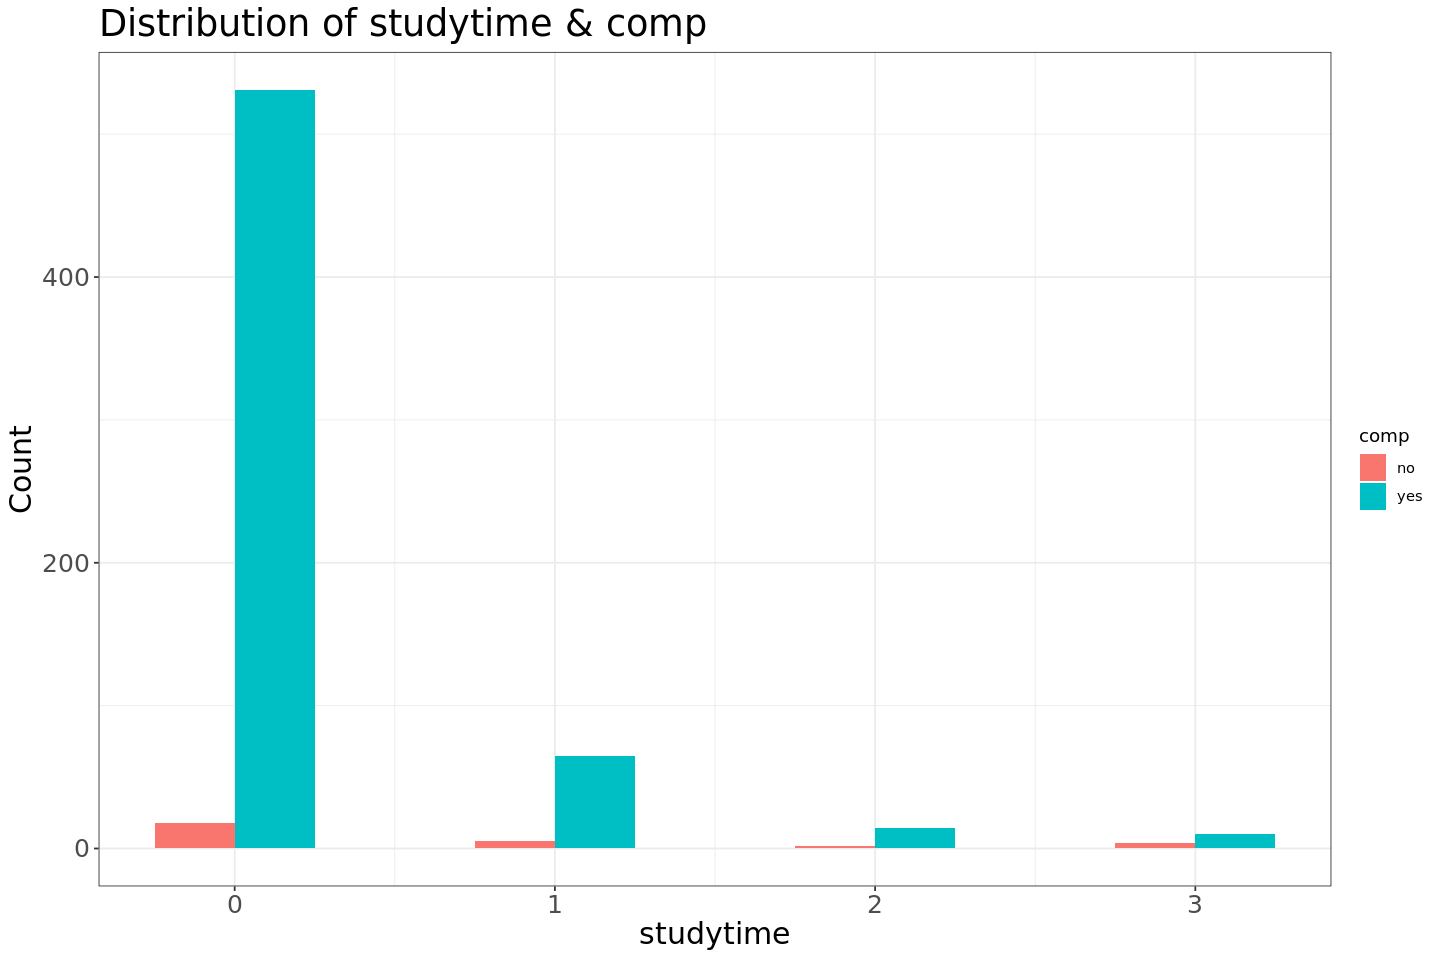

In [17]:
## traveltime과 성적이 상관이 없다는 것을 확인했다.

traveltime_comp_table=xtabs(~traveltime+comp,student)
chisq.test(traveltime_comp_table)

## studytime과 성적이 어느정도 상관이 있다는 것을 확인했다.

studytime_comp_table=xtabs(~studytime+comp,student)
chisq.test(studytime_comp_table)

fig(12,8)
ggplot(student, aes(failures,fill=comp))+
geom_bar(stat="count", position='dodge',width = 0.5)+
labs(x="studytime",
     y="Count", 
     title="Distribution of studytime & comp")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
      axis.text.y= element_text(size=15), axis.title=element_text(size=18))

Warning message in chisq.test(schoolsup_comp_table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  schoolsup_comp_table
X-squared = 0.081953, df = 1, p-value = 0.7747



	Pearson's Chi-squared test with Yates' continuity correction

data:  famsup_comp_table
X-squared = 0.79412, df = 1, p-value = 0.3729


List of 4
 $ axis.title :List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 18
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ axis.text.x:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 15
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ axis.text.y:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 15
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : N

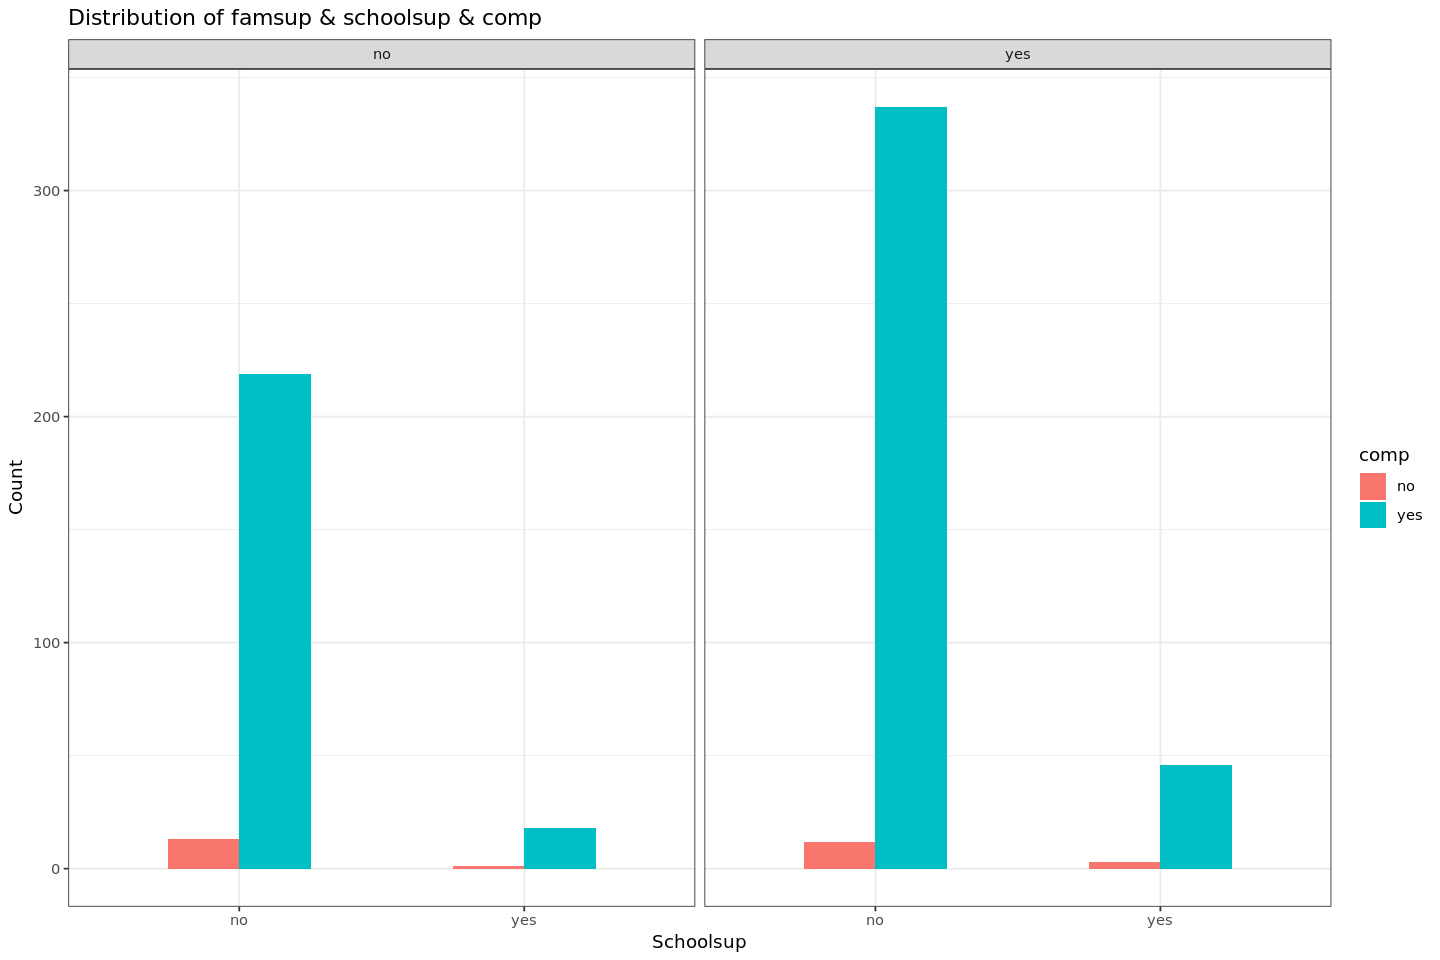

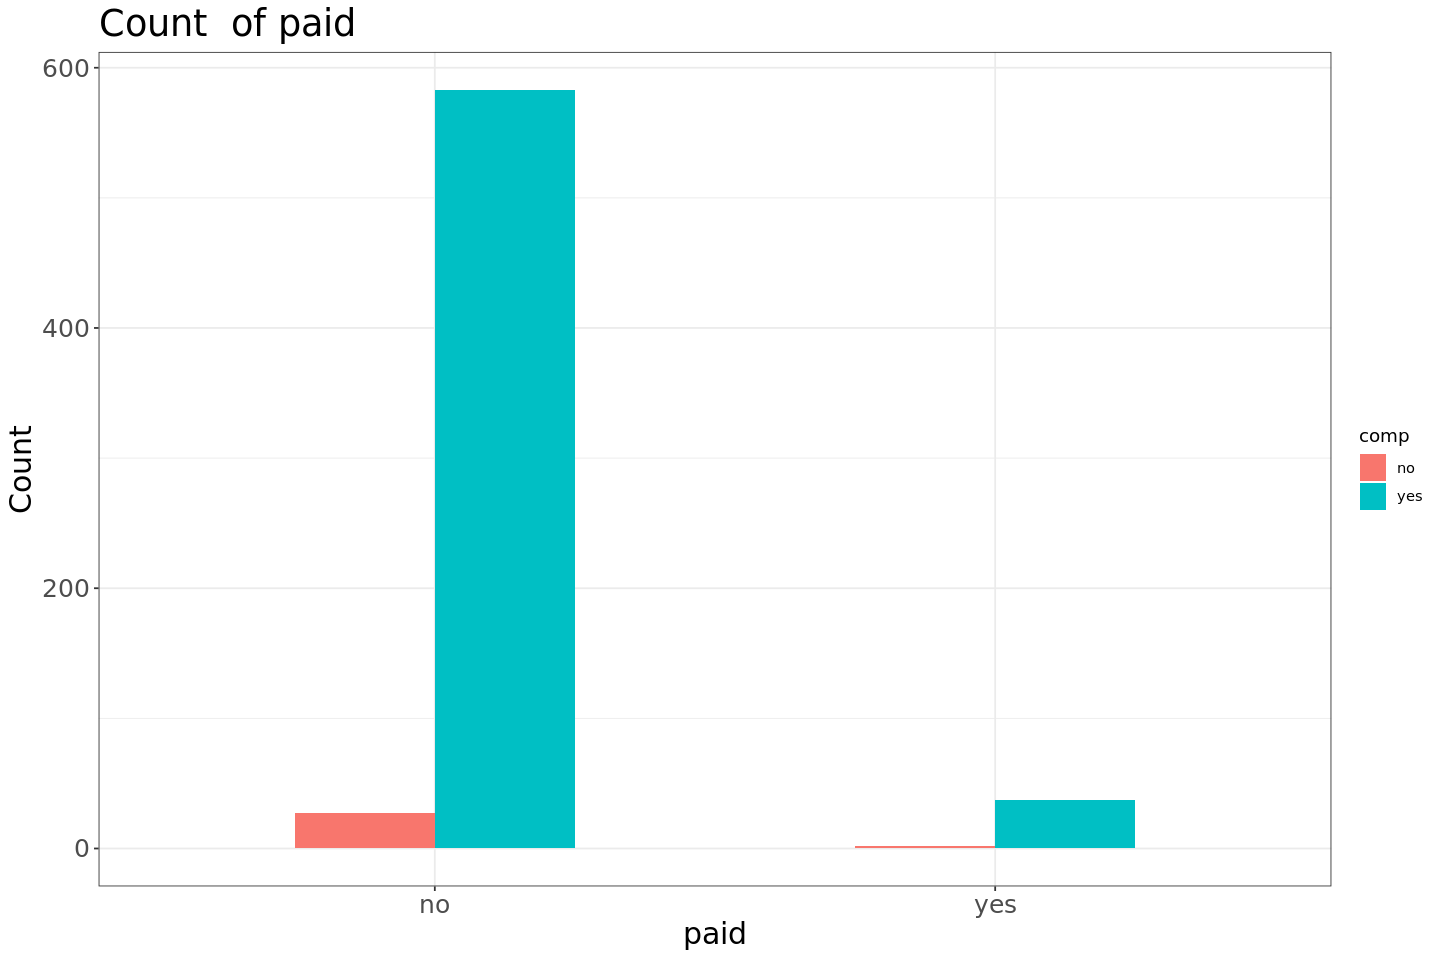

In [18]:
## 도움이 있고 없고는 좋은성적과 나쁜성적의 빈도는 차이가 거의 없었다. 

schoolsup_comp_table=xtabs(~schoolsup+comp,student)
chisq.test(schoolsup_comp_table)

famsup_comp_table=xtabs(~famsup+comp,student)
chisq.test(famsup_comp_table)

## 대부분 schoolsup은 안받았지만, famsup은 받았다. 

fig(12,8)
ggplot(student, aes(schoolsup,fill=comp))+
geom_bar(stat="count", position='dodge',width = 0.5)+
labs(x="Schoolsup",
     y="Count", 
     title="Distribution of famsup & schoolsup & comp")+ 
theme_bw()+
facet_wrap(~famsup)
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
      axis.text.y= element_text(size=15), axis.title=element_text(size=18))

## 대부분 paid 도 없다. 

fig(12,8)
ggplot(student, aes(paid,fill=comp))+
geom_bar(stat="count", position='dodge',width = 0.5)+
labs(x="paid",
     y="Count", 
     title="Count  of paid")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
      axis.text.y= element_text(size=15), axis.title=element_text(size=18))

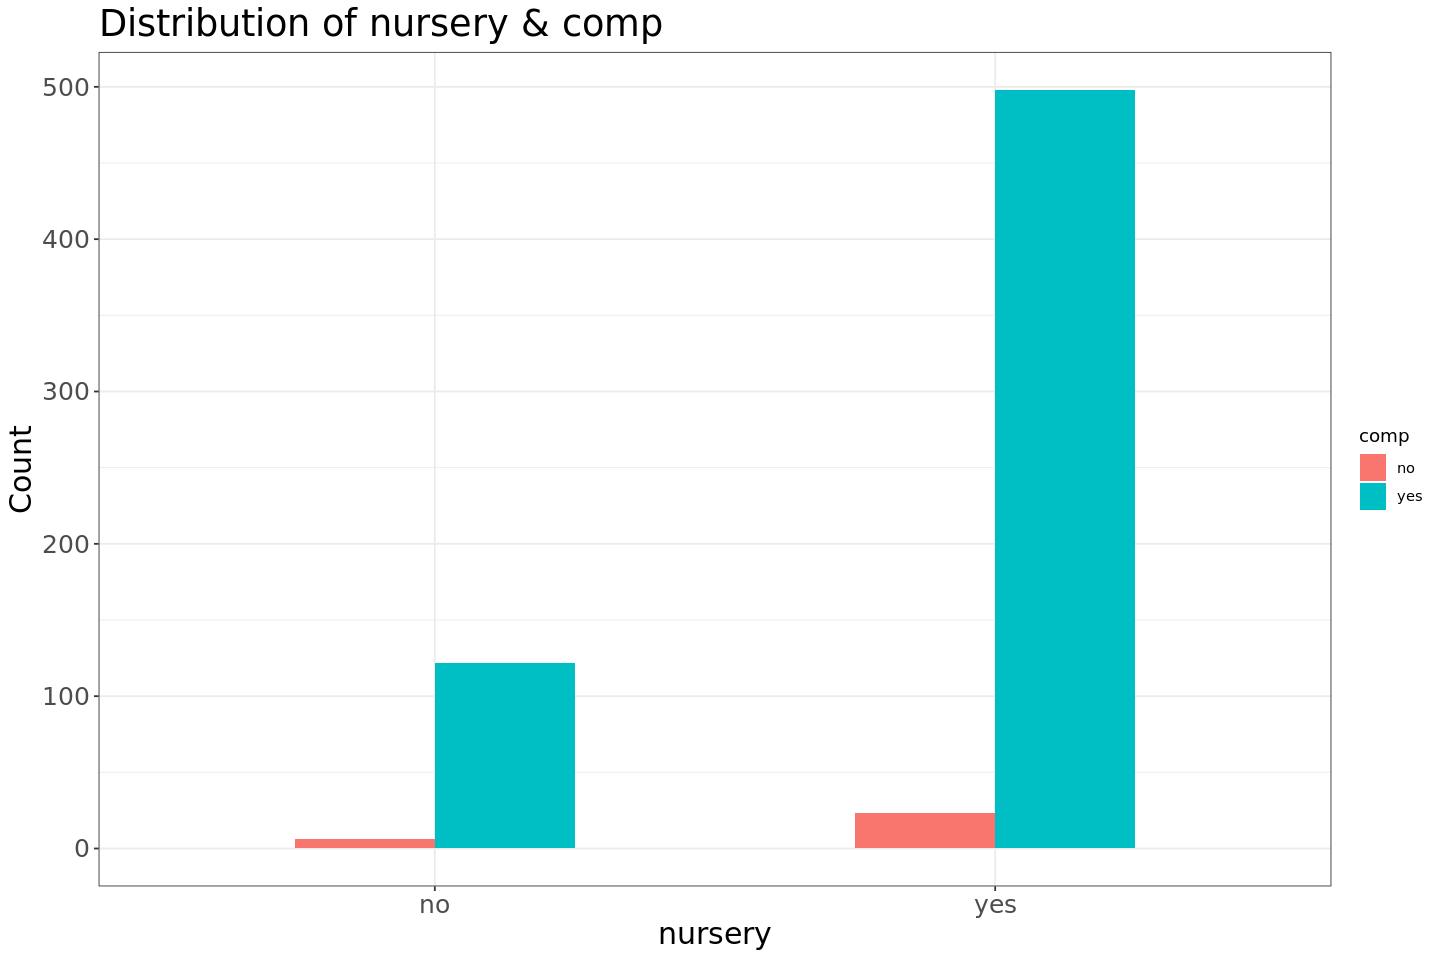

In [19]:
## activities의 차이는 없고, 대부분 nursery(보육원)을 다닌다. 

fig(12,8)
ggplot(student, aes(nursery,fill=comp))+
geom_bar(stat="count", position='dodge',width = 0.5)+
labs(x="nursery",
     y="Count", 
     title="Distribution of nursery & comp")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
      axis.text.y= element_text(size=15), axis.title=element_text(size=18))


	Pearson's Chi-squared test with Yates' continuity correction

data:  internet_comp_table
X-squared = 0.012365, df = 1, p-value = 0.9115


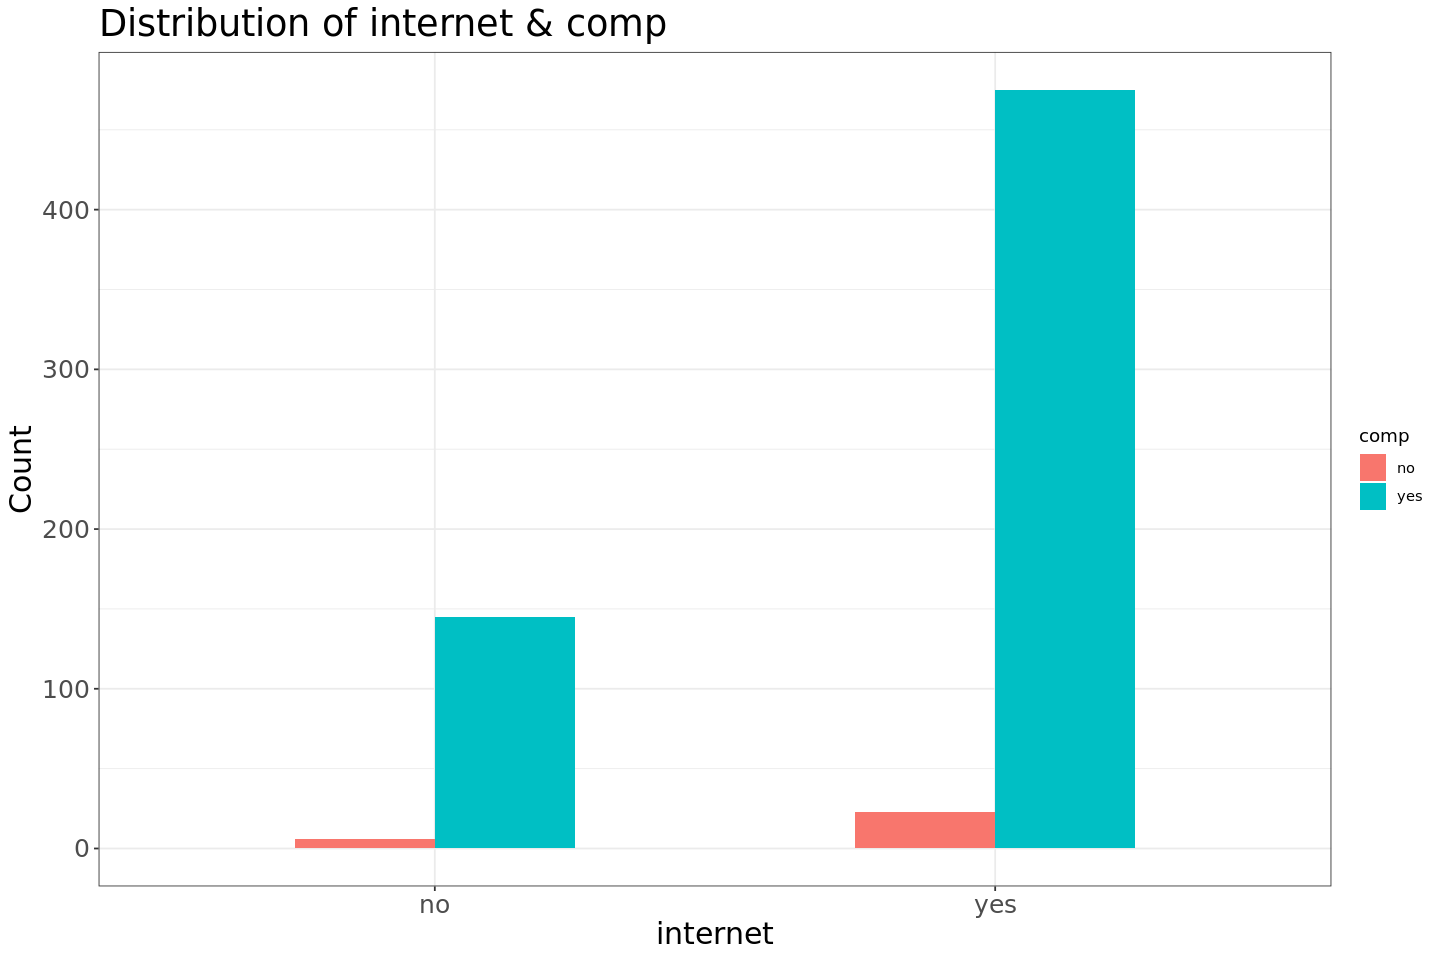

In [20]:
## internet은 거의 다 있었다. 

internet_comp_table=xtabs(~internet+comp,student)
chisq.test(internet_comp_table)

fig(12,8)
ggplot(student, aes(internet,fill=comp))+
geom_bar(stat="count", position='dodge',width = 0.5)+
labs(x="internet",
     y="Count", 
     title="Distribution of internet & comp")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
      axis.text.y= element_text(size=15), axis.title=element_text(size=18))


	Pearson's Chi-squared test with Yates' continuity correction

data:  romantic_comp_table
X-squared = 1.2343, df = 1, p-value = 0.2666


Warning message in chisq.test(famrel_comp_table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  famrel_comp_table
X-squared = 5.0761, df = 4, p-value = 0.2796


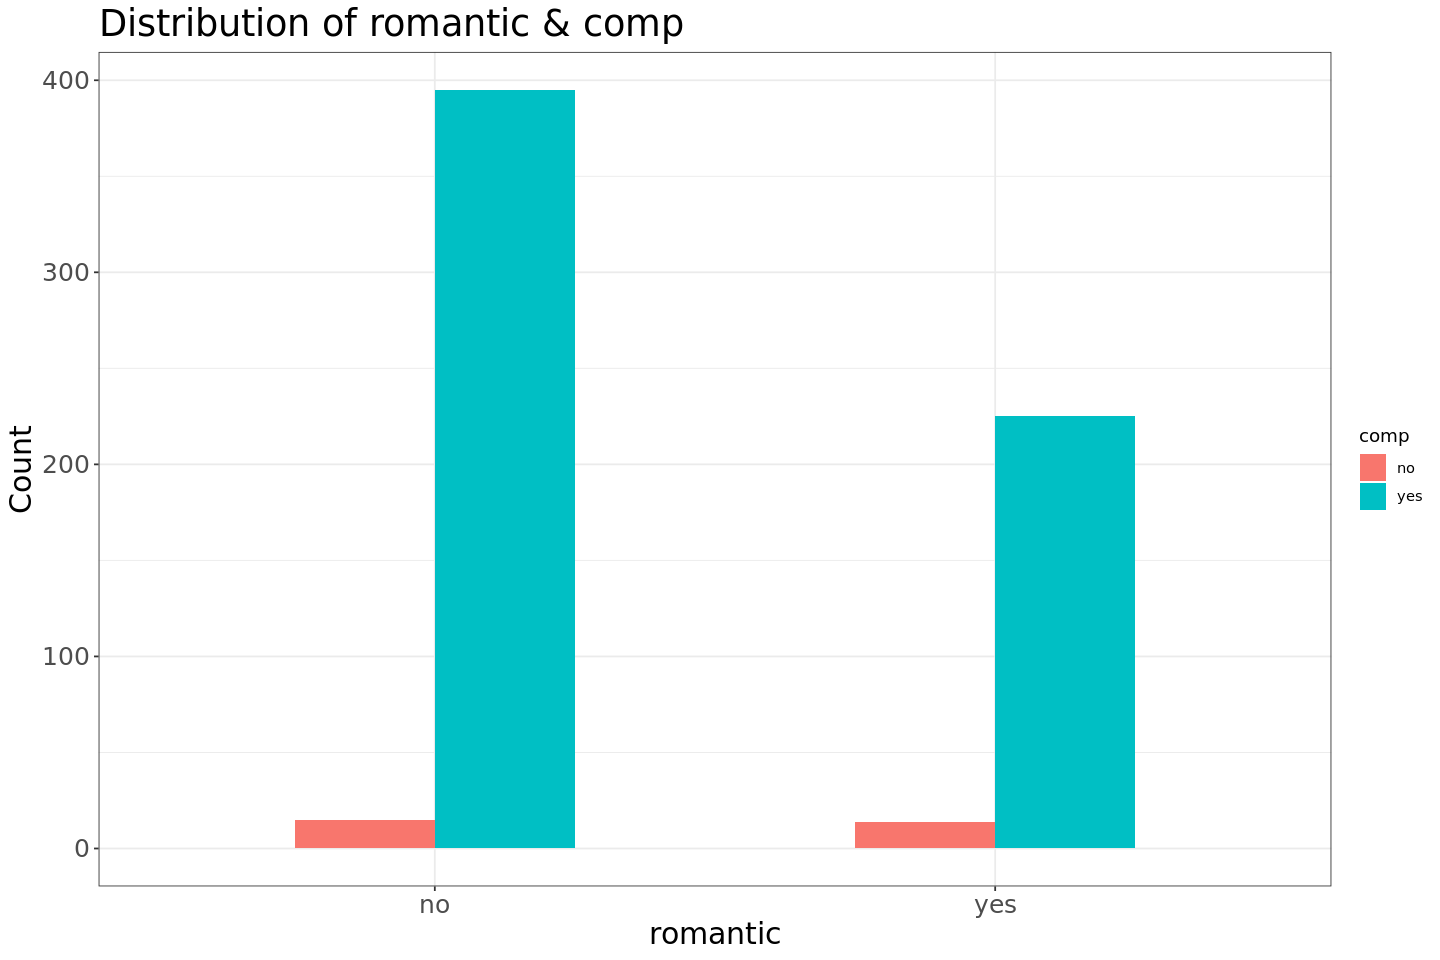

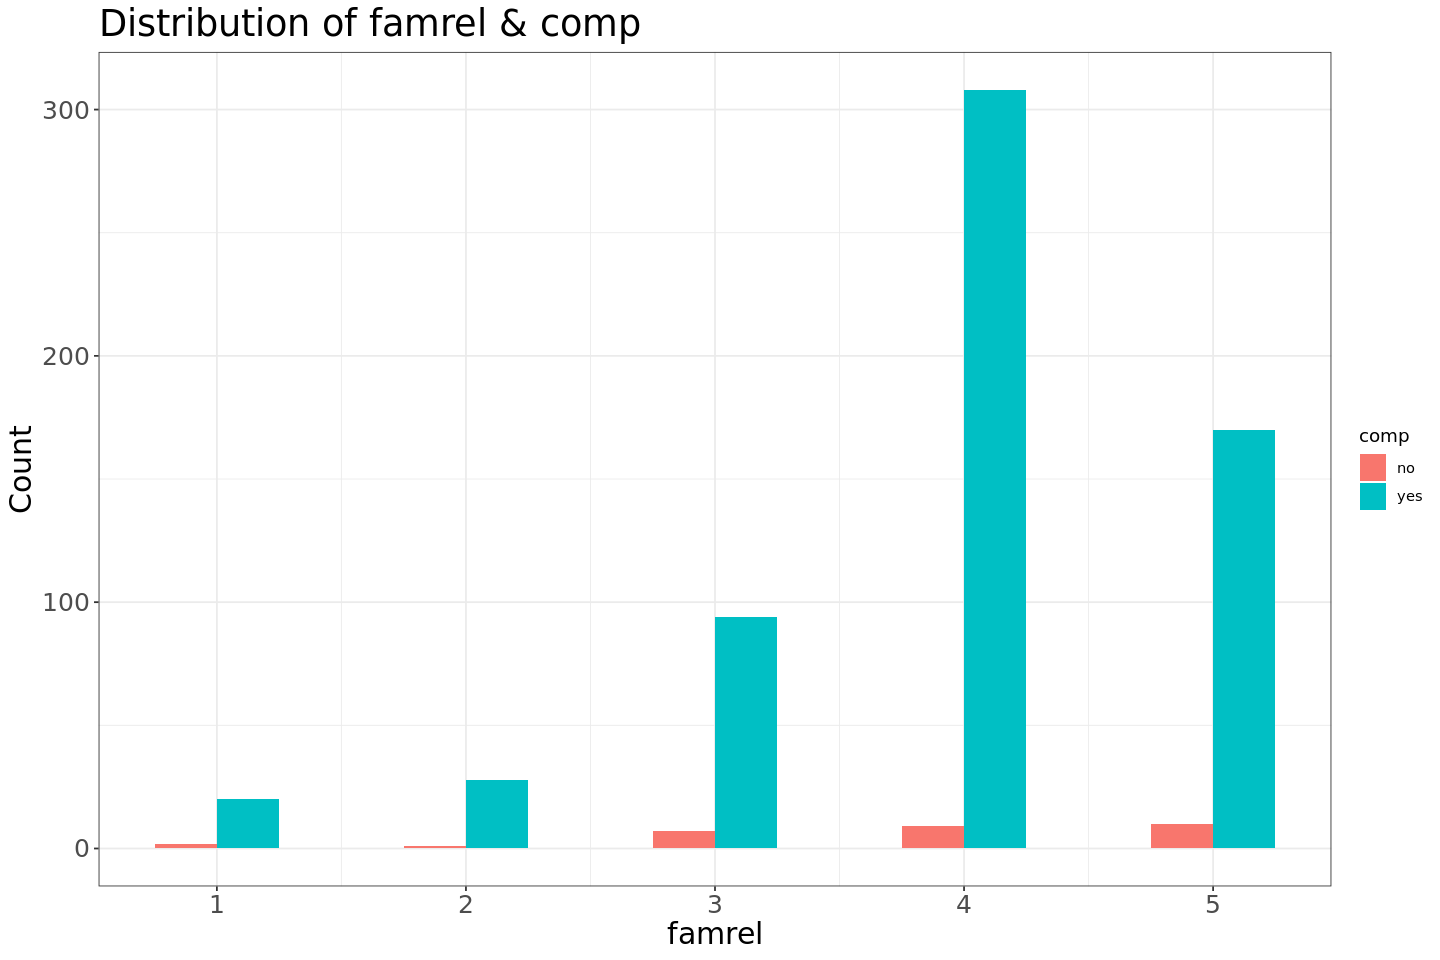

In [21]:
## romantic은 좋은성적에는 차이가 없어 보인다.

romantic_comp_table=xtabs(~romantic+comp,student)
chisq.test(romantic_comp_table)

fig(12,8)
ggplot(student, aes(romantic,fill=comp))+
geom_bar(stat="count", position='dodge',width = 0.5)+
labs(x="romantic",
     y="Count", 
     title="Distribution of romantic & comp")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
      axis.text.y= element_text(size=15), axis.title=element_text(size=18))

## famrel에 따른 차이가 없었다.
famrel_comp_table=xtabs(~famrel+comp,student)
chisq.test(famrel_comp_table)

fig(12,8)
ggplot(student, aes(famrel,fill=comp))+
geom_bar(stat="count", position='dodge',width = 0.5)+
labs(x="famrel",
     y="Count", 
     title="Distribution of famrel & comp")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
      axis.text.y= element_text(size=15), axis.title=element_text(size=18))

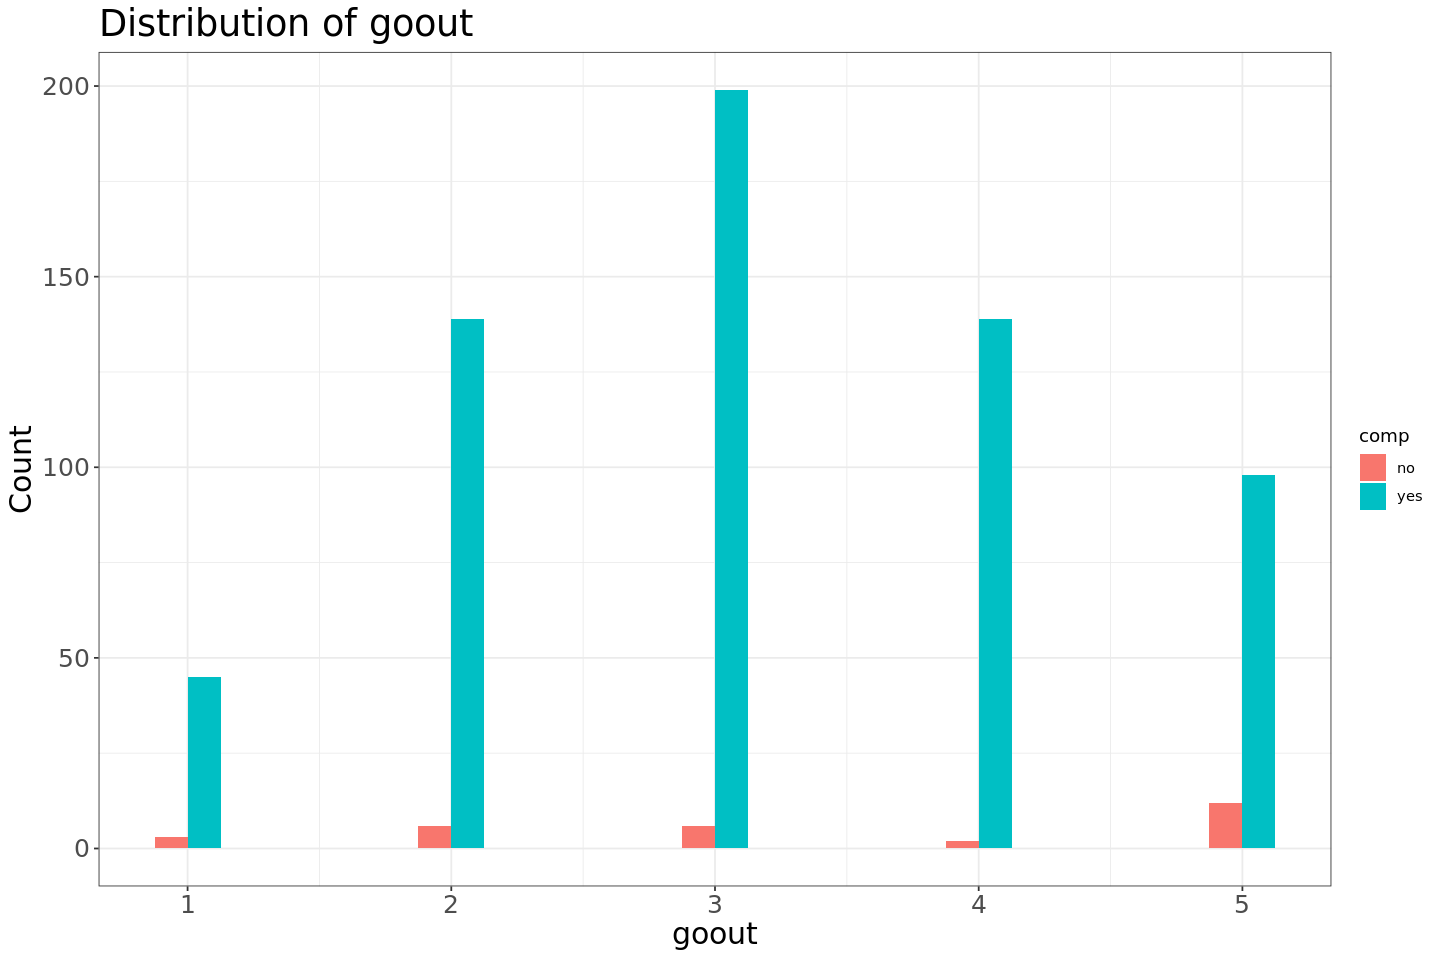

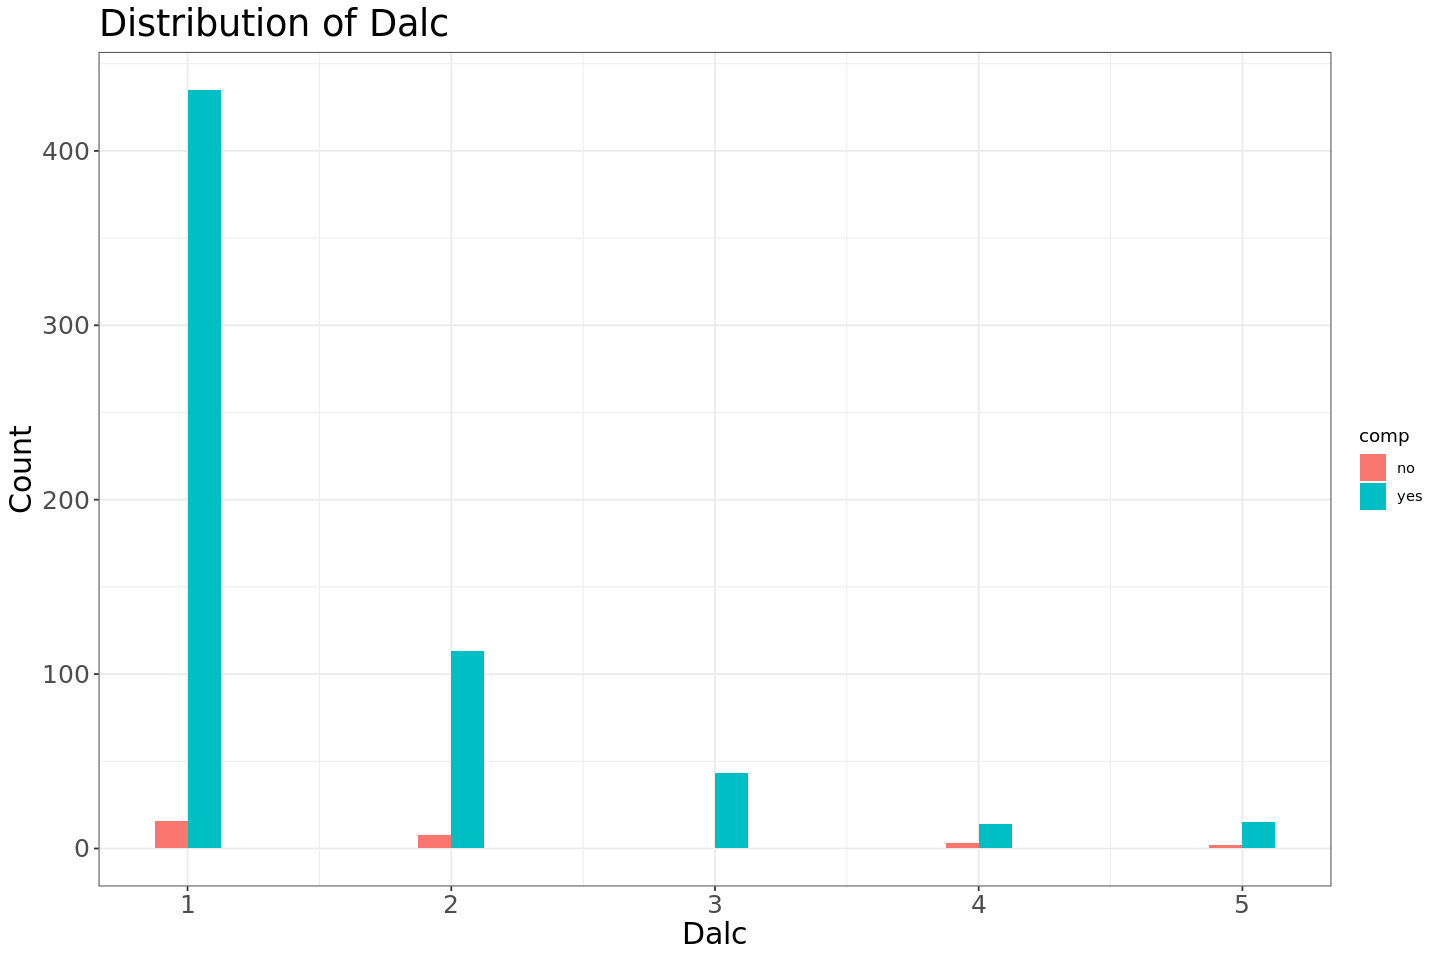

In [22]:
## hist with freetime 

## goout
## 보통 좋은 성적을 받지 못한 아이들이 goout이 높다.

fig(12,8)
ggplot(student, aes(x=goout,group=comp,fill=comp))+
geom_histogram(position="dodge",binwidth=0.25)+
labs(x="goout",
     y="Count", 
     title="Distribution of goout")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
      axis.text.y= element_text(size=15), axis.title=element_text(size=18))

## freetime 
## 좋은성적을 받은아이들과 받지 않은 아이들의 분포가 비슷하다 
# fig(12,8)
# ggplot(student, aes(x=freetime,group=comp,fill=comp))+
# geom_histogram(position="dodge",binwidth=0.25)+
# labs(x="freetime",
#      y="Count", 
#      title="Distribution of freetime")+ 
# theme_bw()+
# theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
#       axis.text.y= element_text(size=15), axis.title=element_text(size=18))

## Dalc
## 보통 술을 거의 안먹는다.
fig(12,8)
ggplot(student, aes(x=Dalc,group=comp,fill=comp))+
geom_histogram(position="dodge",binwidth=0.25)+
labs(x="Dalc",
     y="Count", 
     title="Distribution of Dalc")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
      axis.text.y= element_text(size=15), axis.title=element_text(size=18))

## Walc
## 좋은성적을 받은아이들과 받지 않은 아이들의 분포가 비슷하다 
# fig(12,8)
# ggplot(student, aes(x=Walc,group=comp,fill=comp))+
# geom_histogram(position="dodge",binwidth=0.25)+
# labs(x="Walc",
#      y="Count", 
#      title="Distribution of Walc")+ 
# theme_bw()+
# theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
#       axis.text.y= element_text(size=15), axis.title=element_text(size=18))

## health
## 대부분 건강하며 차이가 없다.
# fig(12,8)
# ggplot(student, aes(x=health,group=comp,fill=comp))+
# geom_histogram(position="dodge",binwidth=0.25)+
# labs(x="health",
#      y="Count", 
#      title="Distribution of health")+ 
# theme_bw()+
# theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
#       axis.text.y= element_text(size=15), axis.title=element_text(size=18))

In [23]:
## freetime과 goout이 약한 양의 상관관계가 있다.
## goout과 Dalc가 약한 양의 상관관계가 있다.
cor(student[,c('freetime','goout','Dalc','Walc','health')],method='spearman')

## grade
## grade간에 상관관계가 있기 때문에 다중공선성문제를 해결하기 위해 제거한다.
cor(student[,c('G1','G2','G3')],method='spearman')

,freetime,goout,Dalc,Walc,health
freetime,1.00000000,0.3543453,0.12717156,0.1201480,0.09510536
goout,0.35434528,1.0000000,0.23397658,0.3724547,-0.01212210
Dalc,0.12717156,0.2339766,1.00000000,0.6130561,0.08494647
Walc,0.12014798,0.3724547,0.61305611,1.0000000,0.11428202
health,0.09510536,-0.0121221,0.08494647,0.1142820,1.00000000


,G1,G2,G3
G1,1.0000000,0.8930649,0.8832876
G2,0.8930649,1.0000000,0.9444512
G3,0.8832876,0.9444512,1.0000000


comp,x
<chr>,<dbl>
no,5.172414
yes,3.588710


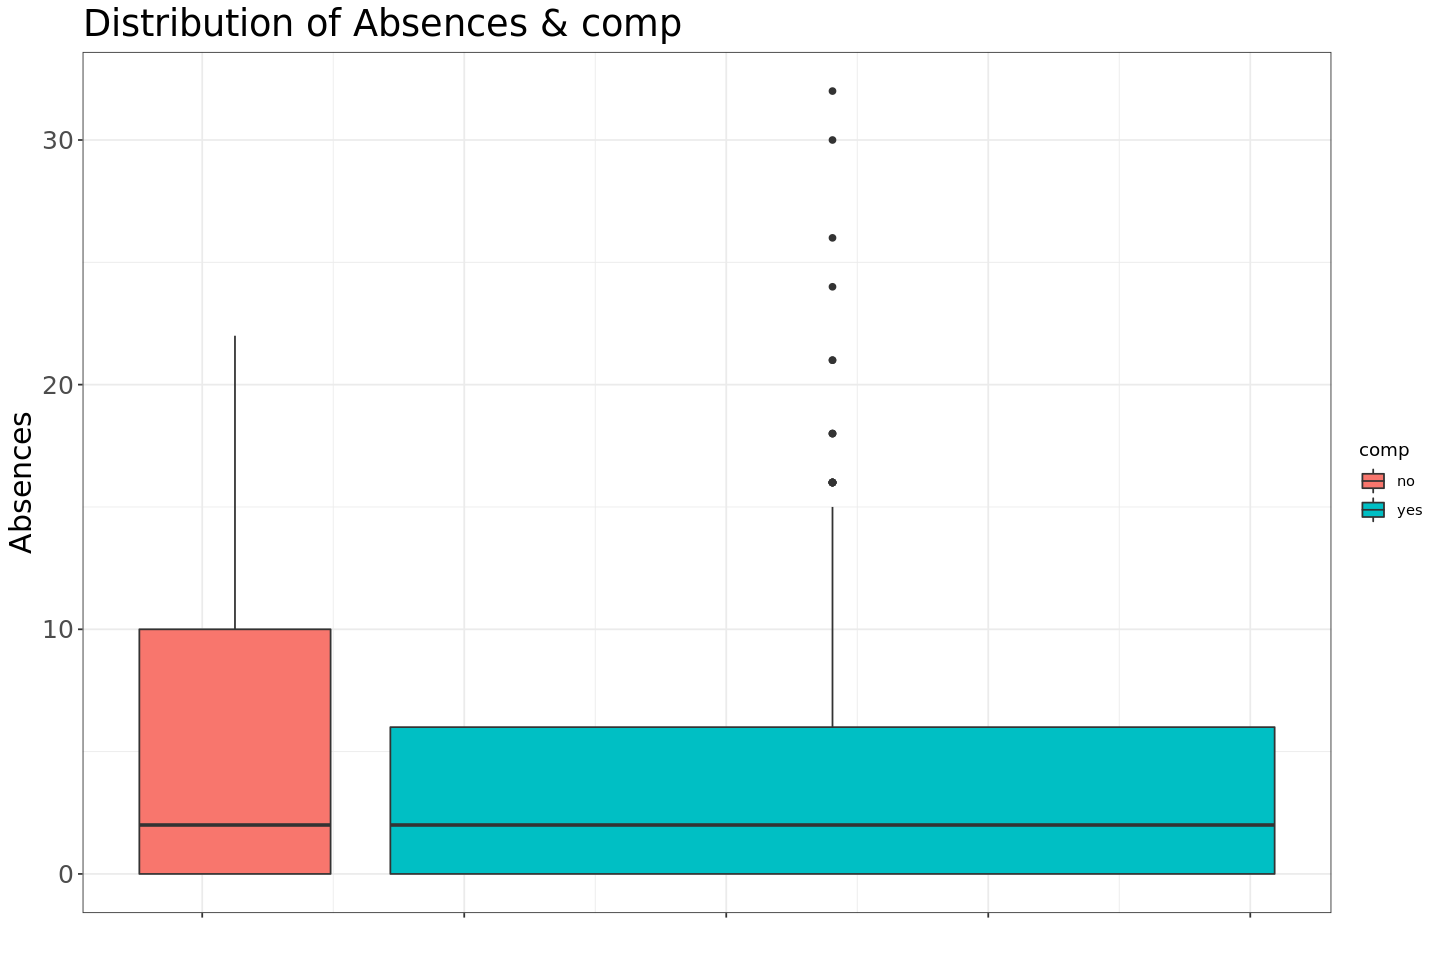

In [24]:
## 좋은 성적과 결석의 평균에는 차이가 있다.
aggregate(student[,c('absences')],by=list(comp=student$comp),mean)

## 보통 성적이 안좋은 아이들은 결석이 빈번하다. 
## 하지만, 오히려 좋은 성적을 받은 애들이 결석을 많이 하는 경우도 있긴있다.

fig(12,8)
ggplot(student,aes(y=absences,fill=comp))+ 
geom_boxplot(varwidth=T)+
labs(x="",
     y="Absences", 
     title="Distribution of Absences & comp")+  
theme_bw()+
theme(plot.title = element_text(size=22),
      axis.text.x= element_blank(),
      axis.text.y= element_text(size=15),
      axis.title=element_text(size=18))

In [25]:
## modeling 대비 데이터 전처리
student=read.csv(file = 'StudentPer.csv',sep=';',stringsAsFactors = T)
student$comp=ifelse((student$G1<=student$G3)|(student$G2<=student$G3),1,0)
student$comp=as.factor(student$comp)

# student %>% head()

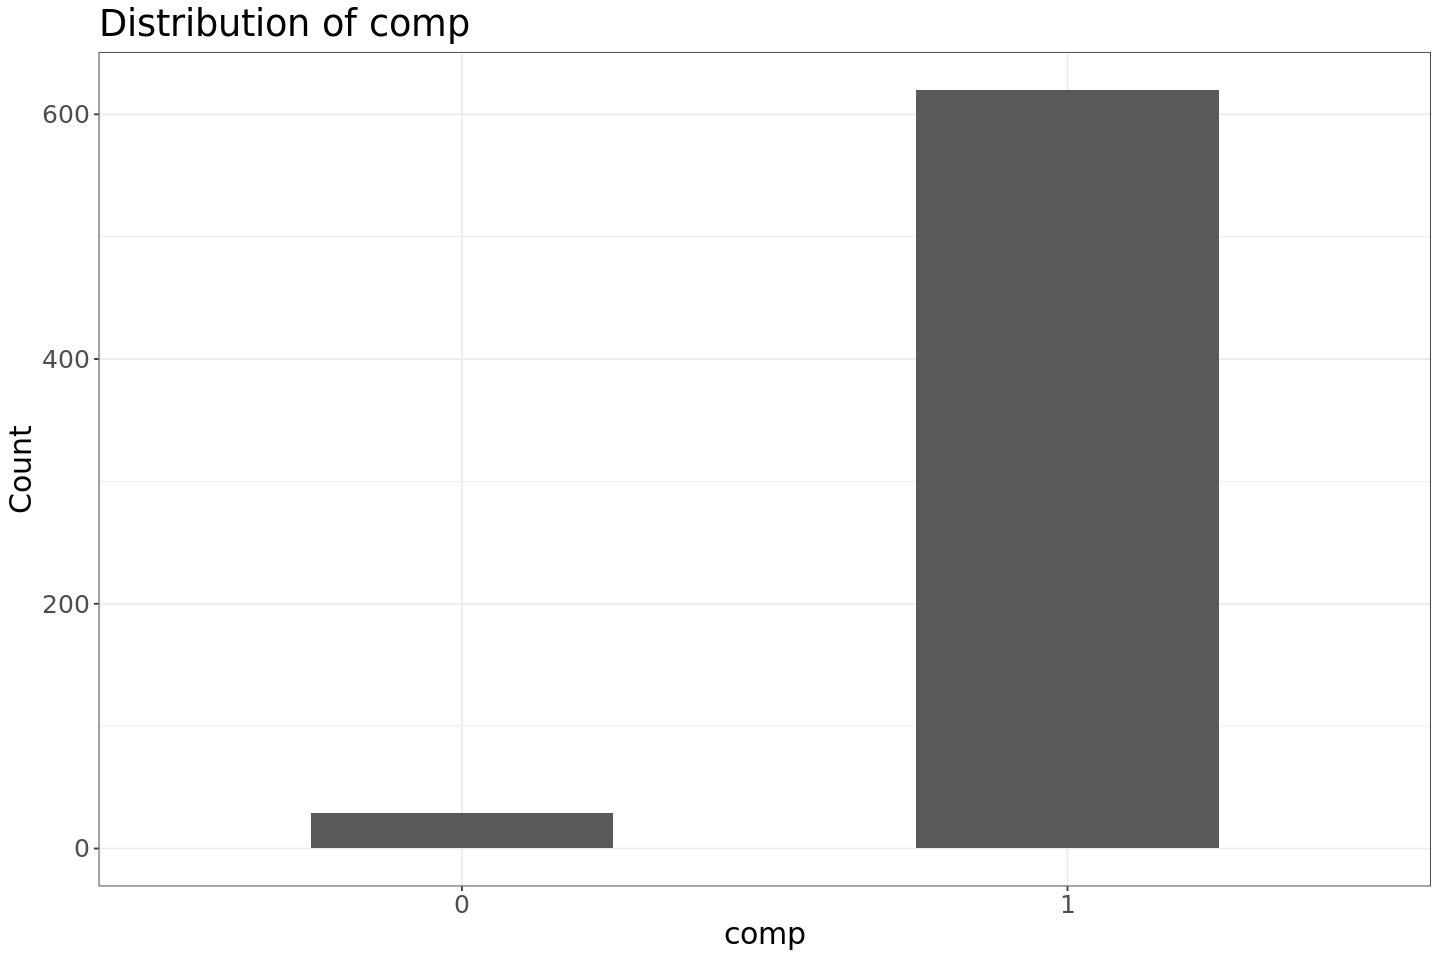

In [26]:
fig(12,8)
ggplot(student, aes(comp))+
geom_bar(stat="count", position='dodge',width = 0.5)+
labs(x="comp",
     y="Count", 
     title="Distribution of comp")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
      axis.text.y= element_text(size=15), axis.title=element_text(size=18))

In [27]:
## stratified hold out 
## https://gist.github.com/mrdwab/6424112

stratified <- function(df, group, size, select = NULL, 
                       replace = FALSE, bothSets = FALSE) {
  if (is.null(select)) {
    df <- df
  } else {
    if (is.null(names(select))) stop("'select' must be a named list")
    if (!all(names(select) %in% names(df)))
      stop("Please verify your 'select' argument")
    temp <- sapply(names(select),
                   function(x) df[[x]] %in% select[[x]])
    df <- df[rowSums(temp) == length(select), ]
  }
  df.interaction <- interaction(df[group], drop = TRUE)
  df.table <- table(df.interaction)
  df.split <- split(df, df.interaction)
  if (length(size) > 1) {
    if (length(size) != length(df.split))
      stop("Number of groups is ", length(df.split),
           " but number of sizes supplied is ", length(size))
    if (is.null(names(size))) {
      n <- setNames(size, names(df.split))
      message(sQuote("size"), " vector entered as:\n\nsize = structure(c(",
              paste(n, collapse = ", "), "),\n.Names = c(",
              paste(shQuote(names(n)), collapse = ", "), ")) \n\n")
    } else {
      ifelse(all(names(size) %in% names(df.split)),
             n <- size[names(df.split)],
             stop("Named vector supplied with names ",
                  paste(names(size), collapse = ", "),
                  "\n but the names for the group levels are ",
                  paste(names(df.split), collapse = ", ")))
    }
  } else if (size < 1) {
    n <- round(df.table * size, digits = 0)
  } else if (size >= 1) {
    if (all(df.table >= size) || isTRUE(replace)) {
      n <- setNames(rep(size, length.out = length(df.split)),
                    names(df.split))
    } else {
      message(
        "Some groups\n---",
        paste(names(df.table[df.table < size]), collapse = ", "),
        "---\ncontain fewer observations",
        " than desired number of samples.\n",
        "All observations have been returned from those groups.")
      n <- c(sapply(df.table[df.table >= size], function(x) x = size),
             df.table[df.table < size])
    }
  }
  temp <- lapply(
    names(df.split),
    function(x) df.split[[x]][sample(df.table[x],
                                     n[x], replace = replace), ])
  set1 <- do.call("rbind", temp)
  
  if (isTRUE(bothSets)) {
    set2 <- df[!rownames(df) %in% rownames(set1), ]
    list(SET1 = set1, SET2 = set2)
  } else {
    set1
  }
}

In [28]:
train=stratified(student, "comp", 0.85)

valid_idx=setdiff(rownames(student), rownames(train))
valid=student[valid_idx,]

In [29]:
## 1. 외부요인(거리)과 관련이 있다. 

# model=glm(comp~address+reason+traveltime,data=train,family='binomial'(link='logit'))
# summary(model)

## 2. 외부요인(가족)과 관련이 있다. 

# model=glm(comp~famsize+Pstatus+Medu+Fedu+Mjob+Fjob+guardian+famsup+nursery+famrel,data=train,family='binomial'(link='logit'))
# summary(model)

## 3. 외부요인(학교)와 관련이 있다.

# model=glm(comp~school+reason+schoolsup+paid+activities+absences,data=train,family='binomial'(link='logit'))
# summary(model)

## 4. 내부요인(자신)와 관련이 있다.

# model=glm(comp~sex+age+studytime+failures+higher+romantic+freetime+goout+Dalc+health+absences,data=train,family='binomial'(link='logit'))
# summary(model)

## 5. 성적과 관련이 있다. 

# model=glm(comp~G1+G2+G3,data=train,family='binomial'(link='logit'))
# summary(model)

## 최종모델
logit=glm(comp~absences+failures+Fedu+Mjob+reason+G3-1, data = train, family = 'binomial'(link='logit'))
summary(logit)
# confint(logit)


Call:
glm(formula = comp ~ absences + failures + Fedu + Mjob + reason + 
    G3 - 1, family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3042   0.0876   0.1362   0.2398   1.4773  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
absences         -0.10141    0.03917  -2.589  0.00962 ** 
failures         -0.23535    0.33623  -0.700  0.48394    
Fedu              0.27406    0.28547   0.960  0.33704    
Mjobat_home       1.02720    1.10583   0.929  0.35294    
Mjobhealth       -1.03682    1.39703  -0.742  0.45799    
Mjobother        -0.86063    0.90212  -0.954  0.34008    
Mjobservices     -0.99478    1.11267  -0.894  0.37129    
Mjobteacher      -0.87576    1.31932  -0.664  0.50682    
reasonhome        0.06382    0.68198   0.094  0.92544    
reasonother      -0.68102    0.71572  -0.952  0.34134    
reasonreputation -0.04238    0.71721  -0.059  0.95288    
G3                0.39440    0.06627   5

In [30]:
pred=predict(logit,valid, type = "response")
# 93/97

In [31]:
confusionMatrix(data = as.factor(as.numeric(pred>0.5)), reference = valid$comp)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0  1  0
         1  3 93
                                          
               Accuracy : 0.9691          
                 95% CI : (0.9123, 0.9936)
    No Information Rate : 0.9588          
    P-Value [Acc > NIR] : 0.4293          
                                          
                  Kappa : 0.3899          
                                          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 0.25000         
            Specificity : 1.00000         
         Pos Pred Value : 1.00000         
         Neg Pred Value : 0.96875         
             Prevalence : 0.04124         
         Detection Rate : 0.01031         
   Detection Prevalence : 0.01031         
      Balanced Accuracy : 0.62500         
                                          
       'Positive' Class : 0               
                                    

In [32]:
## eval
valid[c(17,55,83),c(1:10)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>
101,GP,M,16,U,GT3,T,4,4,services,services
345,GP,M,18,U,LE3,T,4,4,teacher,teacher
544,MS,M,17,R,GT3,T,4,4,health,other


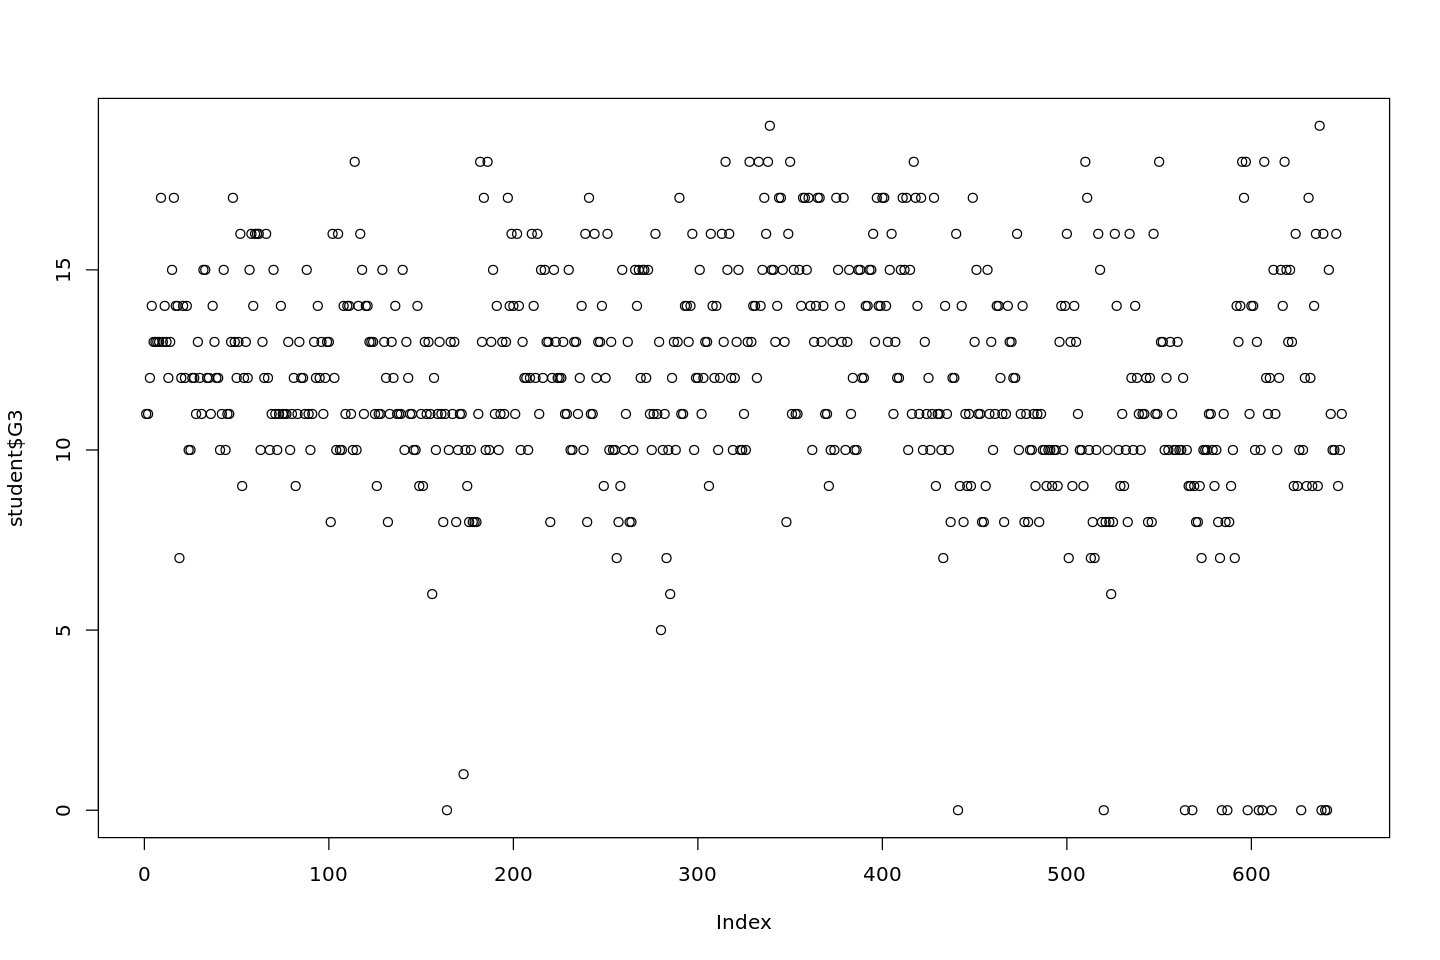

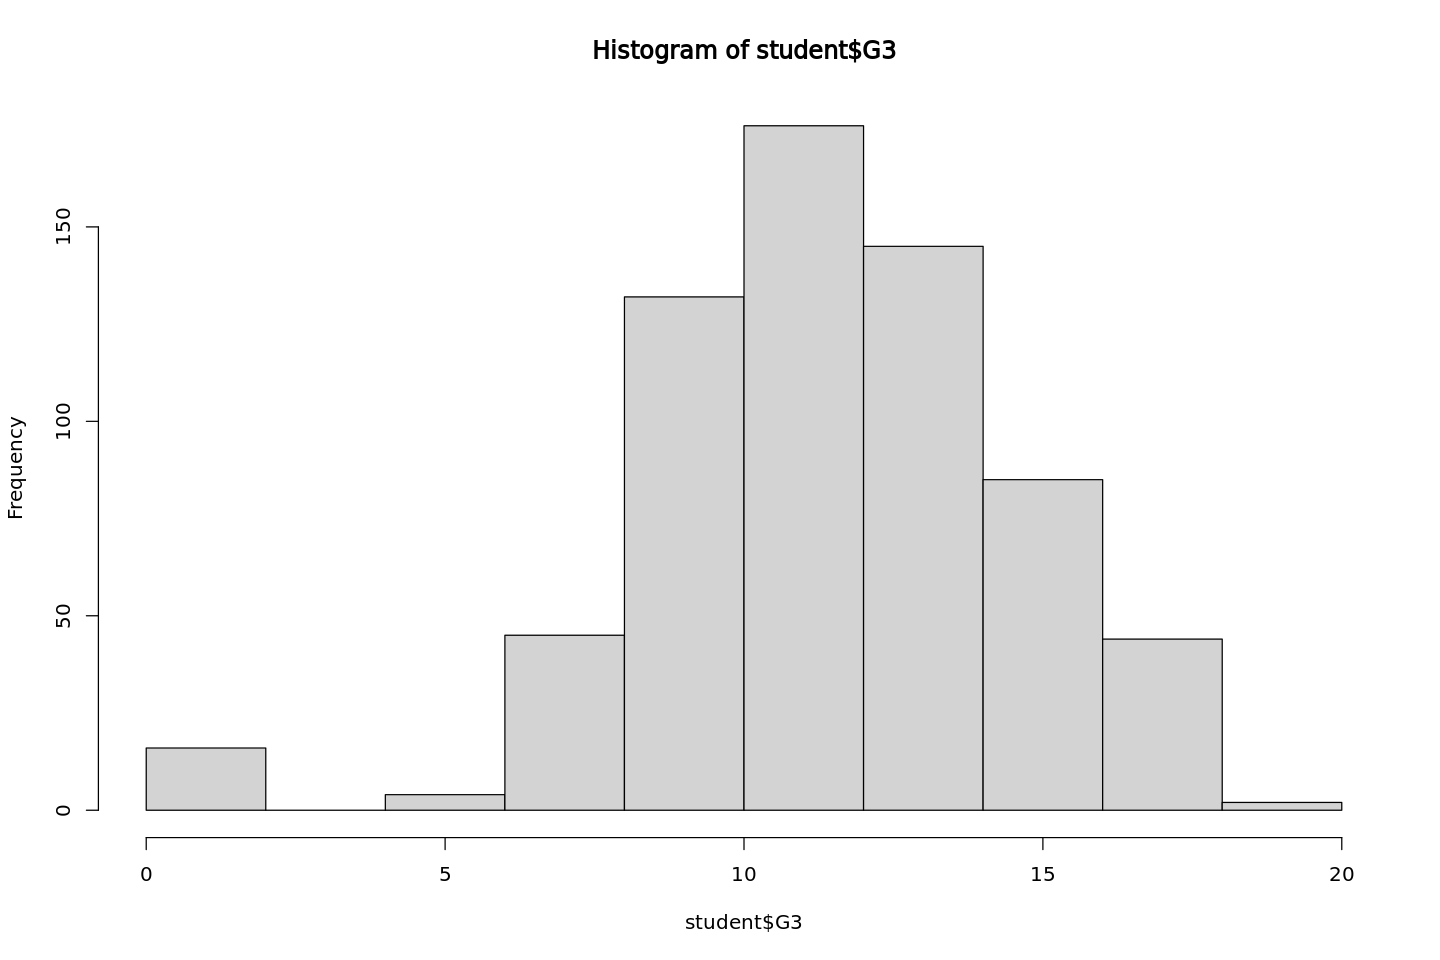

In [39]:
## 다중회귀분석 
## http://uu.diva-portal.org/smash/get/diva2:1464106/FULLTEXT01.pdf 찾아보니 grade는 10을 넘어야 pass라고 한다. 
## G3 마지막 학기로만 다중회귀분석으로도 한다.

plot(student$G3)
hist(student$G3)

In [63]:

## 1. 외부요인(거리)과 관련이 있다. 
## 도시인지, 등교시간이 짧을 수록, reason또한 명성을 봤다면 외부요인이 G3에 영향이 있음을 확인했다. 

# model=lm(G3~address+reason+traveltime,data=train)
# summary(model)

## 2. 외부요인(가족)과 관련이 있다. 

# model=lm(G3~famsize+Pstatus+Medu+Fedu+Mjob+Fjob+guardian+famsup+nursery+famrel,data=train)
# summary(model)

## 3. 외부요인(학교)와 관련이 있다.

# model=lm(G3~school+reason+schoolsup+paid+activities+absences,data=train)
# summary(model)

## 4. 내부요인(자신)와 관련이 있다.

# model=lm(G3~sex+age+studytime+failures+higher+romantic+freetime+goout+Dalc+health+absences,data=train)
# summary(model)

## 5. 성적과 관련이 있다. 

# model=lm(G3~G1+G2+G3,data=train)
# summary(model)

# 최종모델
reg=lm(G3~G1+schoolsup+absences+failures+studytime+higher+Dalc+G2+school+reason-1, data = train)
summary(reg)
# confint(logit)



Call:
lm(formula = G3 ~ G1 + schoolsup + absences + failures + studytime + 
    higher + Dalc + G2 + school + reason - 1, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8639 -0.4644  0.0307  0.6109  3.0240 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
G1                0.11466    0.03949   2.903  0.00384 ** 
schoolsupno       0.21986    0.36155   0.608  0.54338    
schoolsupyes     -0.01759    0.38661  -0.046  0.96372    
absences          0.02512    0.01225   2.050  0.04083 *  
failures         -0.29565    0.11152  -2.651  0.00826 ** 
studytime         0.13401    0.07214   1.858  0.06376 .  
higheryes         0.17994    0.19609   0.918  0.35922    
Dalc             -0.12959    0.06336  -2.045  0.04132 *  
G2                0.88635    0.03654  24.255  < 2e-16 ***
schoolMS         -0.10313    0.12486  -0.826  0.40918    
reasonhome       -0.04322    0.14184  -0.305  0.76067    
reasonother      -0.31411    0.18329  -1.714  0.08715 .  


In [65]:
# https://github.com/USGS-R/ie2misc/blob/master/R/rmse.R

rmse <- function (predicted, observed, na.rm = FALSE) {

# The base::mean.default code has been helpful with regards to the treatment
# of non-numeric values

# The moments::kurtosis code has been helpful with regards to the treatment of
# na.rm

if (length(predicted) < 1 | length(observed) < 1) {

  stop("Check the length of the predicted and observed vectors since one of
  them has a length of 0. Use a different set of values and then try again.")
# Source 1 / provide a stop warning if the length of one of the vectors is 0

} else {

if (length(predicted) != length(observed)) {

  stop("Check the length of the predicted and observed vectors since they don't
  match. Use a different set of values and then try again.")
# Source 1 / provide a stop warning if the length of the numeric vectors do not match

} else {

if (!is.numeric(predicted) | !is.numeric(observed)) {

  stop("Either the predicted or observed vector is not numeric. Use a different
  set of values and then try again.")
# Source 1 / provide a stop warning if the either one of the vectors is not numeric

} else {

if (na.rm == TRUE) {

observed <- observed[!is.na(observed)]

predicted <- predicted[!is.na(predicted)]

n <- length(predicted)

error <- predicted - observed

sqrt((n ^ -1) * sum(abs(error) ^ 2, na.rm = na.rm))

} else {

n <- length(predicted)

error <- predicted - observed

sqrt((n ^ -1) * sum(abs(error) ^ 2, na.rm = na.rm))

}
}
}
}
}

In [66]:
rmse(predict(reg,valid),valid$G3)

[1] 1.161895